## Predicting the top 10 NBA Basketball players of all time

## Introduction
The debate of who the best NBA player ever is a contentious one - some say LeBron, some say MJ and some say old school players like Wilt Chamberlin or Kareem Abdul-Jabbar. Regardless of the opinion, Different people have reasons for their top pick: most dominant, most points, most championships. Today we will be exploring who the top 10 NBA players are using data and machine learning. There will undoubtedly be some subjectivity, but the goal will be to explore some of the top players and use MVP voting from the last ~30 years to determine which attributes are the most valuable and what combination of stats and advanced stats make up the most valuable players. Using these learnings, we will create a top 10 list!

## Libraries we will be using
pandas - data storage and manipulation\
matplotlib - charts and graphs\
seaborn - charts and graphs\
sklearn - machine learning, linear/multiple linear regression, dataset split\
statsmodels - linear regression

In [552]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from statsmodels import api as sm

## Data Source
The source of the data is from Kaggle, Kaggle is a website that contains many different datasets for public use, if you'd like to check them out click this link (https://www.kaggle.com/datasets). The dataset that I used contained the statistics of NBA players going back to 1950 and had over 50 features (stat categories) per player. There were almost 25,000 records. The data was scraped from Basketball-reference (https://www.basketball-reference.com/), which is where we get our MVP voting data from as well.

## Load and display data

In [553]:
df = pd.read_csv("Seasons_Stats.csv")
df.head()
#this data contains all of the season stats of NBA players from 1970 to 2015

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [554]:
df.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,24691.000000,24624.000000,24616.000000,24624.000000,18233.000000,24138.000000,24101.000000,24538.000000,18839.000000,24525.000000,20792.000000,20792.000000,21571.000000,22555.000000,20792.000000,20792.000000,19582.000000,19640.000000,0.0,24585.000000,24585.000000,24585.000000,24101.000000,0.0,20797.000000,20797.000000,20797.000000,20797.000000,24624.000000,24624.000000,24525.000000,18927.000000,18927.000000,15416.000000,24624.000000,24624.000000,24496.000000,24525.000000,24624.000000,24624.000000,23766.000000,20797.000000,20797.000000,24312.000000,24624.000000,20797.000000,20797.000000,19645.000000,24624.000000,24624.000000
mean,12345.000000,1992.594989,26.664405,50.837110,23.593375,1209.720317,12.479071,0.493001,0.158604,0.325455,6.181565,13.708657,9.949210,13.009962,1.648269,1.410624,15.085099,18.906492,NaN,1.257307,1.227395,2.485796,0.065002,NaN,-1.778386,-0.548570,-2.326720,0.559879,195.325820,430.645752,0.430817,22.215037,63.604480,0.248796,178.250447,381.756782,0.445343,0.450658,102.389336,136.775219,0.719279,62.189210,147.199404,224.637381,114.852623,39.897052,24.470260,73.939832,116.339222,510.116350
std,7127.822084,17.429594,3.841892,26.496161,28.632387,941.146575,6.039014,0.094469,0.187495,0.218971,4.872685,6.636402,5.040283,9.191843,1.017024,1.773348,6.919170,5.448157,NaN,2.136256,1.269613,3.058638,0.102471,NaN,3.792947,2.253106,4.691619,1.336892,188.114361,397.624715,0.095921,38.543366,102.442769,0.176683,179.478923,371.260335,0.099803,0.099200,113.373565,146.078918,0.141824,67.324881,145.921912,228.190203,135.863913,38.713053,36.935084,67.713803,84.791873,492.922981
min,0.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-5.100000,-1.000000,-2.800000,-2.519000,NaN,-73.800000,-30.400000,-86.700000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6172.500000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,2.600000,8.800000,5.900000,6.500000,1.100000,0.300000,11.400000,15.400000,NaN,-0.100000,0.200000,0.200000,0.031000,NaN,-3.400000,-1.700000,-4.200000,-0.200000,41.000000,99.000000,0.393000,0.000000,1.000000,0.100000,35.000000,82.000000,0.407000,0.414000,18.000000,27.000000,0.657000,12.000000,33.000000,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000
50%,12345.000000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,5.400000,12.700000,9.200000,10.500000,1.500000,0.900000,14.200000,18.600000,NaN,0.400000,0.800000,1.400000,0.075000,NaN,-1.500000,-0.500000,-1.800000,0.000000,141.000000,321.000000,0.439000,2.000000,11.000000,0.292000,122.000000,270.000000,0.456000,0.463000,63.000000,88.000000,0.743000,38.000000,106.000000,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000
75%,18517.500000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,9.000000,18.100000,13.500000,17.600000,2.100000,1.900000,17.700000,22.200000,NaN,1.900000,1.800000,3.800000,0.115000,NaN,0.300000,0.700000,0.300000,0.900000,299.000000,661.000000,0.480000,27.000000,84.000000,0.363000,268.000000,579.250000,0.496000,0.501000,149.000000,201.000000,0.808000,91.000000,212.000000,322.000000,160.000000,60.000000,29.000000,112.000000,182.000000,778.000000
max,24690.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,100.000000,100.000000,100.000000,100.000000,24.200000,77.800000,100.000000,100.000000,NaN,18.300000,16.000000,25.400000,2.123000,NaN,47.800000,4

## Reduce Dataset
We have a large amount of players (24624), so to determine the list of top players we need to limit the list of players according to some factors. To eliminate data we can't use, we will get rid of any seasons (each stat line is a season statline for a specific player) that don't have STL, BLK, FG, these are important defensive stats that we will have to consider later on, without these stats we won't be able to compare players properly. For help understanding what stat symbols mean please visit (https://www.nba.com/stats/help/glossary/) for more information.

In [555]:
df = df[pd.notnull(df["STL"])]
df = df[pd.notnull(df["BLK"])]
df = df[pd.notnull(df["TOV"])]
df = df[pd.notnull(df["TRB"])]
df.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,19645.000000,19645.000000,19645.000000,19645.000000,18233.000000,19645.000000,19640.000000,19566.000000,18839.000000,19554.000000,19640.000000,19640.000000,19640.000000,19640.000000,19640.000000,19640.000000,19582.000000,19640.000000,0.0,19645.000000,19645.000000,19645.000000,19640.000000,0.0,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19554.000000,18927.000000,18927.000000,15416.000000,19645.000000,19645.000000,19525.000000,19554.000000,19645.000000,19645.000000,18877.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000,19645.000000
mean,14850.475897,1999.475897,26.803614,49.860473,23.593375,1168.571596,12.402760,0.503488,0.158604,0.319378,6.167602,13.715978,9.942912,13.101069,1.651945,1.435723,15.085099,18.906492,NaN,1.229219,1.184169,2.414421,0.065382,NaN,-1.796722,-0.545849,-2.342489,0.553902,187.285823,405.299771,0.438674,22.215037,63.604480,0.248796,165.882718,344.019954,0.456910,0.463559,94.487910,125.477424,0.722158,60.950471,144.843268,205.793739,111.669738,39.252380,24.340799,73.939832,109.474116,490.462662
std,5682.392158,11.263847,3.973302,26.713127,28.632387,925.141538,6.190527,0.094114,0.187495,0.228416,4.923337,6.616705,5.060481,9.493780,1.027133,1.801879,6.919170,5.448157,NaN,2.029621,1.212404,2.946168,0.102126,NaN,3.825790,2.268803,4.719236,1.328385,182.584402,380.568730,0.096358,38.543366,102.442769,0.176683,170.062793,339.937517,0.099417,0.097830,107.579824,137.551674,0.146045,66.540239,143.241547,204.223512,137.530665,38.159662,36.649355,67.713803,81.652565,481.407801
min,5007.000000,1978.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-3.300000,-1.000000,-2.100000,-2.519000,NaN,-73.800000,-30.400000,-86.700000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9930.000000,1990.000000,24.000000,26.000000,0.000000,317.000000,9.700000,0.472000,0.005000,0.198000,2.500000,8.800000,6.000000,6.400000,1.100000,0.400000,11.400000,15.400000,NaN,0.000000,0.200000,0.200000,0.032000,NaN,-3.400000,-1.700000,-4.200000,-0.200000,37.000000,88.000000,0.402000,0.000000,1.000000,0.100000,30.000000,71.000000,0.423000,0.432000,16.000000,23.000000,0.660000,12.000000,33.000000,47.000000,17.000000,9.000000,3.000000,18.000000,36.000000,96.000000
50%,14851.000000,2000.000000,26.000000,55.000000,8.000000,995.000000,12.700000,0.516000,0.064000,0.286000,5.400000,12.700000,9.200000,10.400000,1.500000,0.900000,14.200000,18.600000,NaN,0.400000,0.800000,1.400000,0.076000,NaN,-1.500000,-0.500000,-1.800000,0.000000,132.000000,295.000000,0.445000,2.000000,11.000000,0.292000,110.000000,238.000000,0.467000,0.474000,57.000000,79.000000,0.750000,37.000000,105.000000,146.000000,63.000000,29.000000,11.000000,55.000000,100.000000,342.000000
75%,19771.000000,2009.000000,29.000000,75.000000,45.000000,1906.000000,15.600000,0.551000,0.288000,0.394000,9.000000,18.025000,13.400000,17.900000,2.100000,1.900000,17.700000,22.200000,NaN,1.900000,1.800000,3.700000,0.115000,NaN,0.300000,0.700000,0.300000,0.900000,288.000000,626.000000,0.487000,27.000000,84.000000,0.363000,251.000000,519.000000,0.502000,0.510000,136.000000,183.000000,0.813000,89.000000,210.000000,297.000000,154.000000,59.000000,29.000000,112.000000,171.000000,757.000000
max,24690.000000,2017.000000,44.000000,85.000000,83.000000,3638.000000,129.100000,1.136000,1.000000,6.000000,100.000000,100.000000,100.000000,100.000000,24.200000,77.800000,100.000000,100.000000,NaN,15.200000,9.100000,21.200000,2.123000,NaN,47.800000,46.

## Reducing Players Further
After removing unuseable data, we still have over 19,000 stat lines, which is still too many to compare. We need to greatly reduce the amount of players that we have. Since points scored is one of the most important factors in winning a basketball game, the ability to score those points is very important, we will be eliminating any player that has not been able to average more than 20 pts in any one season. To do this we will take the amount of points they have scored in a season and divide it by the number of games they played to see if it was more than 20. We will then filter our original dataframe on the players that have more than 20.0 PPG (Points per game)

In [556]:
df["PPG"] = df["PTS"]/df["G"]
listofPlayers = df[df.PPG>20.0].Player
listofPlayers = listofPlayers.tolist()
#print(len(listofPlayers))
#do a loop to check if the player is in our list of top 982
#df1 = df[df.Player == listofPlayers]
#print(df)
for index, row in df.iterrows():
    if row['Player'] not in listofPlayers:
        df = df.drop(index)
        
display(df)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG
5010,5010,1978.0,Kareem Abdul-Jabbar*,C,30.0,LAL,62.0,NaN,2265.0,29.2,0.589,NaN,0.290,8.7,26.8,18.1,18.3,2.1,4.1,13.3,27.0,NaN,7.7,4.4,12.1,0.257,NaN,5.5,3.6,9.0,6.3,663.0,1205.0,0.550,NaN,NaN,NaN,663.0,1205.0,0.550,0.550,274.0,350.0,0.783,186.0,615.0,801.0,269.0,103.0,185.0,208.0,182.0,1600.0,25.806452
5028,5028,1978.0,Rick Barry*,SF,33.0,GSW,82.0,NaN,3024.0,20.9,0.509,NaN,0.243,2.5,12.8,7.5,22.6,2.4,0.8,10.7,27.1,NaN,5.9,3.8,9.7,0.154,NaN,2.7,0.4,3.1,3.9,760.0,1686.0,0.451,NaN,NaN,NaN,760.0,1686.0,0.451,0.451,378.0,409.0,0.924,75.0,374.0,449.0,446.0,158.0,45.0,224.0,188.0,1898.0,23.146341
5042,5042,1978.0,Otis Birdsong,SG,22.0,KCK,73.0,NaN,1878.0,17.1,0.530,NaN,0.325,3.8,5.7,4.8,14.1,1.7,0.3,11.7,25.1,NaN,3.3,0.9,4.2,0.108,NaN,1.5,-2.5,-0.9,0.5,470.0,955.0,0.492,NaN,NaN,NaN,470.0,955.0,0.492,0.492,216.0,310.0,0.697,70.0,105.0,175.0,174.0,74.0,12.0,145.0,179.0,1156.0,15.835616
5087,5087,1978.0,Bob Dandridge,SF,30.0,WSB,75.0,NaN,2777.0,16.1,0.528,NaN,0.352,4.9,10.9,7.9,14.7,1.6,0.8,14.9,21.9,NaN,4.2,2.6,6.8,0.118,NaN,1.6,0.5,2.0,2.8,560.0,1190.0,0.471,NaN,NaN,NaN,560.0,1190.0,0.471,0.471,330.0,419.0,0.788,137.0,305.0,442.0,287.0,101.0,44.0,241.0,262.0,1450.0,19.333333
5088,5088,1978.0,Adrian Dantley*,SF,21.0,TOT,79.0,NaN,2933.0,20.9,0.595,NaN,0.603,9.2,12.0,10.6,11.8,1.8,0.4,13.8,21.7,NaN,9.6,2.5,12.2,0.199,NaN,4.1,-0.2,4.0,4.4,578.0,1128.0,0.512,NaN,NaN,NaN,578.0,1128.0,0.512,0.512,541.0,680.0,0.796,265.0,355.0,620.0,253.0,118.0,24.0,228.0,233.0,1697.0,21.481013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24658,24658,2017.0,Andrew Wiggins,SF,21.0,MIN,82.0,82.0,3048.0,16.5,0.534,0.184,0.345,3.9,8.8,6.3,10.6,1.4,0.8,9.4,29.0,NaN,3.3,0.9,4.2,0.066,NaN,0.2,-2.9,-2.7,-0.6,709.0,1570.0,0.452,103.0,289.0,0.356,606.0,1281.0,0.473,0.484,412.0,542.0,0.760,103.0,226.0,329.0,189.0,82.0,30.0,187.0,183.0,1933.0,23.573171
24661,24661,2017.0,Deron Williams,PG,32.0,TOT,64.0,44.0,1657.0,14.0,0.541,0.390,0.182,0.9,9.4,5.1,35.9,1.0,0.4,17.6,22.1,NaN,1.5,0.9,2.4,0.069,NaN,0.2,-2.4,-2.3,-0.1,263.0,600.0,0.438,85.0,234.0,0.363,178.0,366.0,0.486,0.509,90.0,109.0,0.826,14.0,133.0,147.0,360.0,31.0,8.0,138.0,138.0,701.0,10.953125
24662,24662,2017.0,Deron Williams,PG,32.0,DAL,40.0,40.0,1171.0,15.0,0.533,0.400,0.185,1.2,9.3,5.1,40.1,1.1,0.2,16.7,23.7,NaN,1.1,0.7,1.8,0.073,NaN,1.0,-2.4,-1.4,0.2,195.0,453.0,0.430,63.0,181.0,0.348,132.0,272.0,0.485,0.500,69.0,84.0,0.821,13.0,89.0,102.0,274.0,25.0,2.0,98.0,96.0,522.0,13.050000
24663,24663,2017.0,Deron Williams,PG,32.0,CLE,24.0,4.0,486.0,11.4,0.566,0.361,0.170,0.2,9.7,5.1,25.9,0.6,1.0,20.2,18.1,NaN,0.4,0.2,0.6,0.059,NaN,-1.9,-2.6,-4.5,-0.3,68.0,147.0,0.463,22.0,53.0,0.415,46.0,94.0,0.489,0.537,21.0,25.0,0.840,1.0,44.0,45.0,86.0,6.0,6.0,40.0,42.0,179.0,7.458333


## Taking a look at Shooting Guards

In [557]:
display(df[df.Pos=='SG'])

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PPG
5042,5042,1978.0,Otis Birdsong,SG,22.0,KCK,73.0,NaN,1878.0,17.1,0.530,NaN,0.325,3.8,5.7,4.8,14.1,1.7,0.3,11.7,25.1,NaN,3.3,0.9,4.2,0.108,NaN,1.5,-2.5,-0.9,0.5,470.0,955.0,0.492,NaN,NaN,NaN,470.0,955.0,0.492,0.492,216.0,310.0,0.697,70.0,105.0,175.0,174.0,74.0,12.0,145.0,179.0,1156.0,15.835616
5129,5129,1978.0,World B.,SG,24.0,PHI,76.0,NaN,2050.0,17.4,0.539,NaN,0.656,4.7,5.7,5.2,20.6,1.5,1.0,15.3,24.1,NaN,4.6,1.4,6.0,0.140,NaN,1.7,-1.8,-0.1,1.0,390.0,857.0,0.455,NaN,NaN,NaN,390.0,857.0,0.455,0.455,411.0,562.0,0.731,92.0,120.0,212.0,306.0,68.0,41.0,200.0,199.0,1191.0,15.671053
5135,5135,1978.0,George Gervin*,SG,25.0,SAS,82.0,NaN,2857.0,24.7,0.594,NaN,0.377,4.5,10.6,7.7,16.1,2.1,1.9,14.0,29.5,NaN,9.2,2.7,12.0,0.201,NaN,4.7,-0.6,4.1,4.4,864.0,1611.0,0.536,NaN,NaN,NaN,864.0,1611.0,0.536,0.536,504.0,607.0,0.830,118.0,302.0,420.0,302.0,136.0,110.0,306.0,255.0,2232.0,27.219512
5177,5177,1978.0,Eddie Johnson,SG,22.0,ATL,79.0,NaN,1875.0,13.6,0.535,NaN,0.293,2.9,6.1,4.4,18.9,2.5,0.1,17.8,20.2,NaN,1.8,1.8,3.5,0.091,NaN,0.0,-0.9,-1.0,0.5,332.0,686.0,0.484,NaN,NaN,NaN,332.0,686.0,0.484,0.484,164.0,201.0,0.816,51.0,102.0,153.0,235.0,100.0,4.0,168.0,232.0,828.0,10.481013
5182,5182,1978.0,Larry Johnson,SG,23.0,BUF,4.0,NaN,38.0,8.0,0.216,NaN,0.154,2.8,11.2,7.1,23.5,6.1,2.7,17.8,17.7,NaN,-0.2,0.1,-0.1,-0.099,NaN,-6.7,3.8,-2.9,0.0,3.0,13.0,0.231,NaN,NaN,NaN,3.0,13.0,0.231,0.231,0.0,2.0,0.000,1.0,4.0,5.0,7.0,5.0,2.0,3.0,3.0,6.0,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24305,24305,2017.0,Tim Hardaway,SG,24.0,ATL,79.0,30.0,2154.0,15.2,0.568,0.457,0.235,1.8,9.5,5.7,14.3,1.3,0.6,9.5,22.5,NaN,2.7,2.1,4.8,0.107,NaN,1.3,-1.5,-0.3,0.9,415.0,912.0,0.455,149.0,417.0,0.357,266.0,495.0,0.537,0.537,164.0,214.0,0.766,35.0,189.0,224.0,182.0,55.0,15.0,106.0,103.0,1143.0,14.468354
24443,24443,2017.0,C.J. McCollum,SG,25.0,POR,80.0,80.0,2796.0,19.9,0.585,0.305,0.204,2.4,9.2,5.8,18.0,1.3,1.2,9.9,27.5,NaN,6.2,1.4,7.6,0.131,NaN,3.3,-2.2,1.0,2.1,692.0,1441.0,0.480,185.0,440.0,0.420,507.0,1001.0,0.506,0.544,268.0,294.0,0.912,60.0,231.0,291.0,285.0,72.0,42.0,172.0,202.0,1837.0,22.962500
24617,24617,2017.0,Klay Thompson,SG,26.0,GSW,78.0,78.0,2649.0,17.4,0.592,0.470,0.158,2.2,9.2,5.9,9.3,1.2,1.2,8.0,26.1,NaN,4.2,2.9,7.1,0.128,NaN,2.4,-2.1,0.3,1.5,644.0,1376.0,0.468,268.0,647.0,0.414,376.0,729.0,0.516,0.565,186.0,218.0,0.853,49.0,236.0,285.0,160.0,66.0,40.0,128.0,139.0,1742.0,22.333333
24619,24619,2017.0,Marcus Thornton,SG,29.0,WAS,33.0,1.0,575.0,10.4,0.494,0.381,0.129,4.3,10.5,7.5,10.1,1.6,0.4,10.1,18.7,NaN,0.1,0.4,0.5,0.042,NaN,-1.6,-1.5,-3.2,-0.2,84.0,210.0,0.400,28.0,80.0,0.350,56.0,130.0,0.431,0.467,23.0,27.0,0.852,22.0,54.0,76.0,41.0,19.0,3.0,25.0,48.0,219.0,6.636364


## Looking at the Remaining Dataset
Now that we have a much smaller list we can begin some analysis, first let's look at the breakdown by position of the players, maybe big men (PF, C) are more likely dominate the paint and score more or maybe the smaller, more athletic positions are able to score more because of quickness and a better shooting skillset. To do this we will count the players in our dataset that play each position and compare.


In [558]:
positions = df.Pos.drop_duplicates().values
posBreakdown = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]

i=0
for x in positions:
    posBreakdown[i] = len(df[df.Pos == x])
    i = i+1
print(positions)
print(posBreakdown)


['C' 'SF' 'SG' 'PF' 'PG' 'PF-C' 'SF-SG' 'C-PF' 'SF-PF' 'SG-SF' 'PG-SG'
 'PG-SF' 'SG-PG' 'SG-PF']
[377, 806, 859, 682, 486, 3, 8, 3, 4, 4, 5, 1, 3, 1]


## Analysis of Positions
It appears that most appearances on the list are from shooting guards, players like Michael Jordan and Dwyane Wade, this makes sense as they have the agility and more size than point guards. They also don't have the burden of having to involve teammates quite like a point guard does, their main role is to score the ball and since our dataset is mainly filtered by scoring at this point, this is a reasonable result. There are some players that play multiple positions (SF-SG), however the volume of these is so low we can ignore them. 

After SG we have SF and then PF with PG and C trailing behind after that. Centers are typically the biggest players on the court and arguably the least skilled because they have size and can simply shoot over defenders or use their size to get to the basket, however, this also makes them somewhat one-dimensional, which means if they can't dominate in the paint, they are usually limited in their scoring options. 

Point guards typically score less because their job is to run the offense and get others involved, usually they have the highest amount of assists. Though they most likely have the skillset and athleticism, they lack size and their role is not conducive to being the highest scorer. The other 3 positions have a good combination of size, focus on scoring in terms of their role, athleticism and skillset.

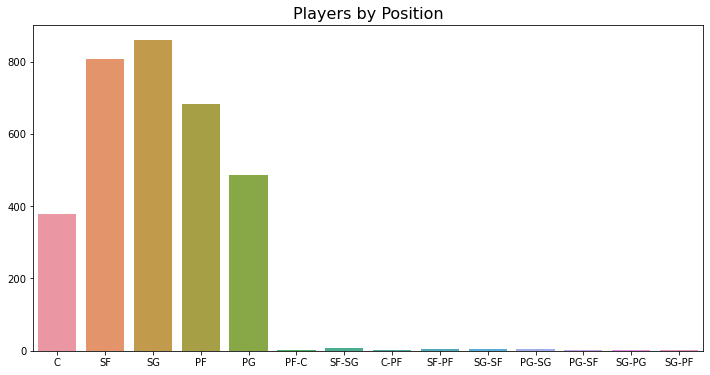

In [559]:
df_pos = df.copy()
df_pos['pos_count'] = 0
for index, row in df_pos.iterrows():
    row['pos_count'] = len(df_pos.Pos == row['Pos'])



plt.figure(figsize=(12,6))
plt.title("Players by Position", fontsize=16)
sea.barplot(x=positions, y=posBreakdown)
plt.show()

## Condensing Dataset
Since we now have a good picture of the breakdown of the top scorers it's time to compile and make the data more useable for our goal. We want to condense the data
so that it is summarized by the career stats not season stats. To do this, we will average all season stats for each player. I calculated the sum of some stats first so I could look at career totals, but those stats were later averaged as well.

In [560]:
grouped_sum = df.groupby('Player',as_index = False)['G','GS','MP','FG','FGA','3P','3PA','2P','2PA','FT','FTA','ORB','DRB','TRB', 'AST','STL','BLK','TOV','PF','PTS'].sum()
grouped_avg = df.groupby('Player',as_index = False)['PER','TS%', '3PAr','FTr','ORB%','DRB%','TRB%', 'AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS','WS/48','VORP','FG%','3P%','2P%', 'eFG%', 'FT%'].mean()
#result = grouped.agg(combine_it)
#grouped[['G','GS','MP','FG','FGA','3P','3PA','2P','2PA','FT','FTA','ORB','DRB','TRB', 'AST','STL','BLK','TOV','PF','PTS']].sum()
#grouped[['PER','TS%', '3PAr','FTr','ORB%','DRB%','TRB%', 'AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS','WS/48','VORP','FG%','3P%','2P%', 'eFG%', 'FT%']].mean()

grouped = grouped_sum.merge(grouped_avg, how='inner', on='Player')

grouped['PPG'] = 0.0

for index, row in grouped.iterrows():
    grouped.at[index, 'PPG'] = row['PTS']/row['G']

    
for index, row in grouped.iterrows():
    if row['PPG'] < 20.0:
        grouped = grouped.drop(index)

display(grouped)

<ipython-input-560-4efdfba8b0ab>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_sum = df.groupby('Player',as_index = False)['G','GS','MP','FG','FGA','3P','3PA','2P','2PA','FT','FTA','ORB','DRB','TRB', 'AST','STL','BLK','TOV','PF','PTS'].sum()
<ipython-input-560-4efdfba8b0ab>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_avg = df.groupby('Player',as_index = False)['PER','TS%', '3PAr','FTr','ORB%','DRB%','TRB%', 'AST%','STL%','BLK%','TOV%','USG%','OWS','DWS','WS','WS/48','VORP','FG%','3P%','2P%', 'eFG%', 'FT%'].mean()


,Player,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,VORP,FG%,3P%,2P%,eFG%,FT%,PPG
0,Adrian Dantley*,1030.0,613.0,36690.0,8673.0,16157.0,7.0,42.0,8666.0,16115.0,7357.0,9017.0,2338.0,3467.0,5805.0,3110.0,1014.0,172.0,2894.0,2754.0,24710.0,20.488889,0.600000,0.006643,0.565611,7.066667,9.677778,8.400000,12.755556,1.322222,0.261111,12.355556,25.122222,6.572222,1.416667,8.011111,0.177833,2.600000,0.519944,0.132727,0.520889,0.520500,0.808611,23.990291
3,Alex English*,1211.0,753.0,39816.0,11080.0,21872.0,20.0,89.0,11060.0,21783.0,4441.0,5347.0,2979.0,3996.0,6975.0,4550.0,1123.0,877.0,3035.0,3155.0,26621.0,19.381250,0.545625,0.004357,0.240312,7.981250,11.256250,9.587500,16.462500,1.287500,1.193750,11.737500,25.800000,5.000000,1.537500,6.543750,0.120750,2.356250,0.504375,0.230500,0.505250,0.504875,0.821125,21.982659
5,Allen Iverson*,1064.0,1042.0,43303.0,9532.0,22369.0,1158.0,3704.0,8374.0,18665.0,7235.0,9256.0,814.0,3025.0,3839.0,6488.0,2213.0,185.0,3740.0,2006.0,27457.0,19.440000,0.523100,0.151900,0.430650,2.105000,7.745000,4.920000,27.735000,2.395000,0.290000,13.200000,29.990000,3.310000,2.130000,5.435000,0.108000,2.300000,0.433700,0.341050,0.454650,0.457550,0.767100,25.805451
10,Andrew Wiggins,245.0,245.0,8862.0,1800.0,4001.0,199.0,605.0,1601.0,3396.0,1196.0,1573.0,342.0,652.0,994.0,523.0,246.0,126.0,546.0,538.0,4995.0,15.633333,0.531333,0.147333,0.397333,4.433333,8.600000,6.500000,10.166667,1.433333,1.133333,10.566667,26.266667,2.933333,0.533333,3.466667,0.056333,-0.300000,0.449333,0.322000,0.470667,0.473000,0.760333,20.387755
13,Anthony Davis,335.0,330.0,11531.0,2843.0,5543.0,78.0,269.0,2765.0,5274.0,1733.0,2203.0,849.0,2555.0,3404.0,590.0,436.0,793.0,595.0,815.0,7497.0,26.300000,0.574000,0.042200,0.391600,8.320000,25.040000,16.580000,9.360000,1.960000,5.560000,8.480000,27.400000,6.220000,3.540000,9.740000,0.200200,3.560000,0.513400,0.185600,0.523600,0.519400,0.781400,22.379104
20,Bernard King*,874.0,547.0,29417.0,7830.0,15109.0,23.0,134.0,7807.0,14975.0,3972.0,5444.0,1704.0,3356.0,5060.0,2863.0,866.0,230.0,2791.0,2885.0,19655.0,18.464286,0.559429,0.011083,0.368857,6.342857,12.550000,9.414286,15.628571,1.292857,0.400000,13.921429,27.278571,3.521429,1.842857,5.371429,0.113643,1.964286,0.517786,0.159900,0.520786,0.518857,0.718857,22.488558
23,Blake Griffin,471.0,471.0,16567.0,3906.0,7547.0,80.0,268.0,3826.0,7279.0,2225.0,3305.0,1154.0,3269.0,4423.0,1954.0,455.0,269.0,1159.0,1412.0,10117.0,22.742857,0.560714,0.037000,0.426429,7.757143,22.157143,15.071429,21.757143,1.400000,1.285714,11.314286,27.785714,6.028571,2.914286,8.900000,0.179429,3.657143,0.516429,0.276857,0.524714,0.522143,0.679000,21.479830
37,Carmelo Anthony,1053.0,1053.0,38085.0,9300.0,20575.0,1267.0,3638.0,8033.0,16937.0,6259.0,7680.0,1860.0,5132.0,6992.0,3278.0,1098.0,517.0,2931.0,3057.0,26126.0,21.025000,0.544938,0.179500,0.371250,5.537500,15.506250,10.525000,16.256250,1.456250,1.056250,10.800000,31.531250,4.412500,2.150000,6.562500,0.132250,1.950000,0.451062,0.339375,0.472500,0.482500,0.817000,24.811016
40,Charles Barkley*,1073.0,1012.0,39330.0,8435.0,15605.0,538.0,2020.0,7897.0,13585.0,6349.0,8643.0,4260.0,8286.0,12546.0,4215.0,1648.0,888.0,3376.0,3287.0,23757.0,24.193750,0.602812,0.126812,0.549625,12.512500,23.962500,18.337500,17.693750,2.018750,1.306250,14.812500,24.531250,7.712500,3.375000,11.068750,0.211063,5.850000,0.532750,0.244250,0.572125,0.549500,0.727937,22.140727
50,Clyde Drexler*,1162.0,1025.0,40265.0,8906.0,18911.0,974.0,3011.0,7932.0,15900.0,5062.0,6404.0,2767.0,4390.0,7157.0,6487.0,2343.0,764.0,3163.0,3491.0,23848.0,20.929412,0.547412,0.177118,0.340235,7.511765,12.335294,9.947059,24.570588,2.788235,1.194118,12.817647,25.247059,5.517647,3.158824,8.664706,0.173118,4.788235,0.466118,0.291294,0.495882,0.495118,0.788647,20.523236


## Looking at Career Totals
I thought it would be interesting to look at some career totals and see if any players stand out. We will look at total games played, highest win shares, and most points scored

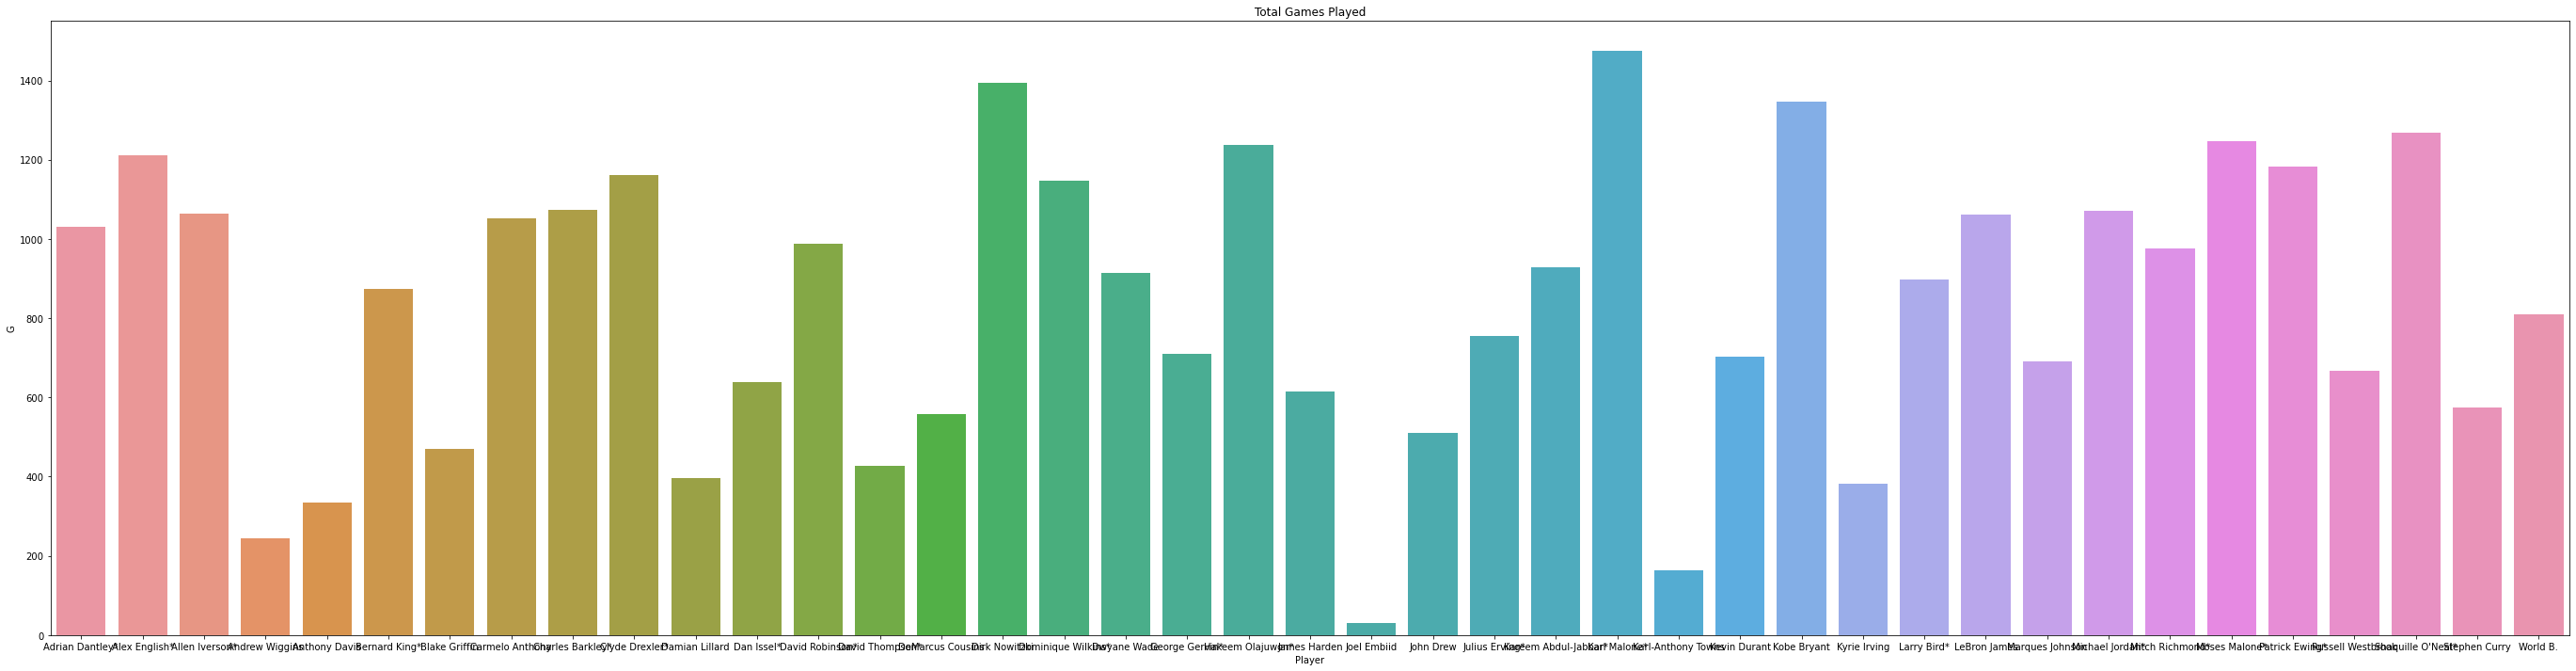

In [561]:
plt.figure(figsize=(48,12))
plt.title("Total Games Played")
sea.barplot(data=grouped, x='Player', y='G')
plt.show()
#we can look at the total number of games players have played

In our dataset it looks like Karl Malone played the most amount of games, interesting note is there are very few players with a few amount of games, meaning there aren't too many new players in our list currently.

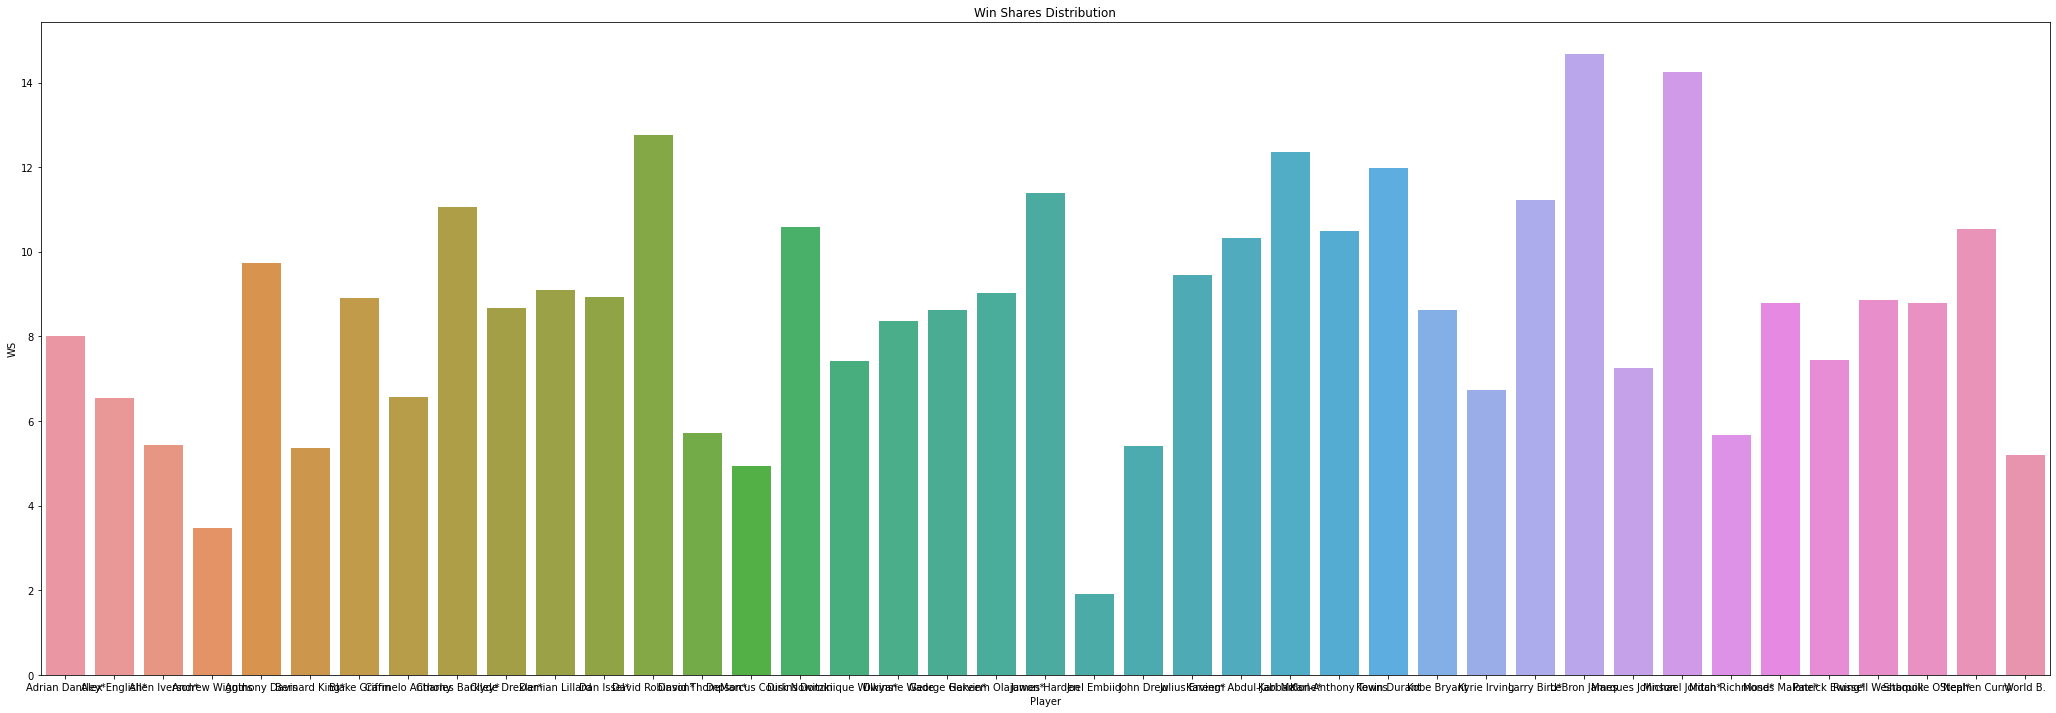

In [562]:
plt.figure(figsize=(36,12))
plt.title("Win Shares Distribution")
sea.barplot(data=grouped, x='Player', y='WS')
plt.show()

The largest amount of win shares goes to LeBron James followed closely by Michael Jordan.

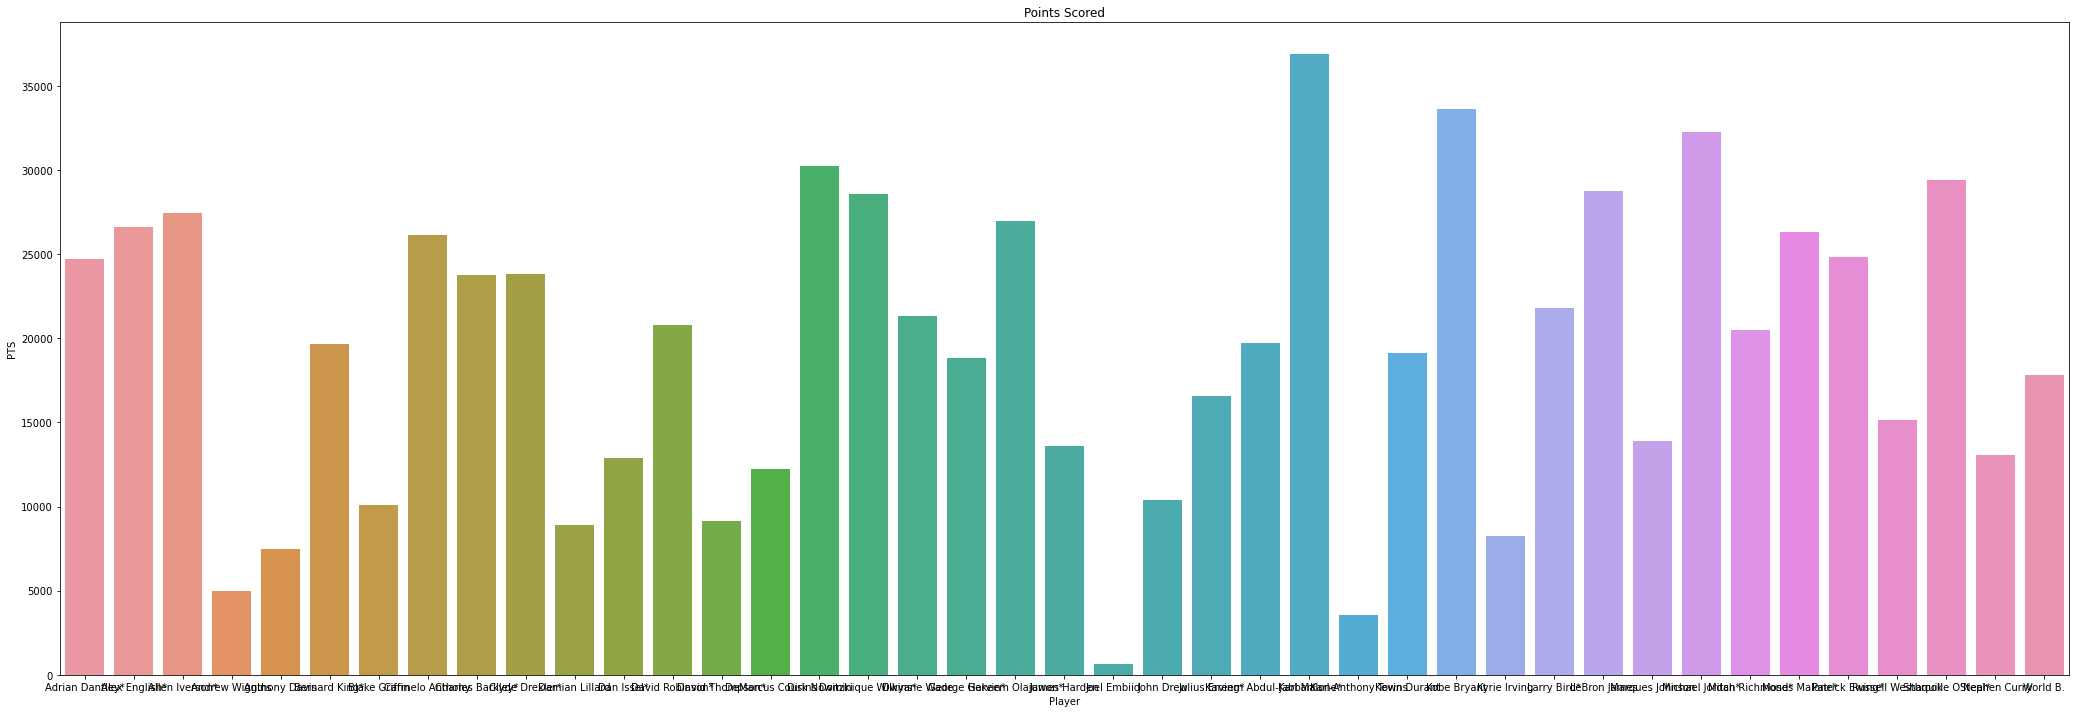

In [564]:
plt.figure(figsize=(36,12))
plt.title("Points Scored")
sea.barplot(data=grouped, x='Player', y='PTS')
plt.show()

Most points scored goes to Kareem Abdul-Jabbar, who is pretty far out in front compared to everyone else.

## Converting to Averages
Now we can convert these stats to a per game basis. We take our totals and divide by the amount of games they played.

In [565]:

grouped['TRBG'] = 0.0
grouped['STL'] = 0.0
grouped['ASTG'] = 0.0
grouped['BLKG'] = 0.0


for index, row in grouped.iterrows():
    grouped.at[index, 'TRB'] = row['TRB']/row['G']
    grouped.at[index, 'STL'] = row['STL']/row['G']
    grouped.at[index, 'AST'] = row['AST']/row['G']
    grouped.at[index, 'BLK'] = row['BLK']/row['G']
    grouped.at[index, 'PTS'] = row['PTS']/row['G']




pd.set_option('display.expand_frame_repr', False)

display(grouped)

,Player,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,VORP,FG%,3P%,2P%,eFG%,FT%,PPG,TRBG,ASTG,BLKG
0,Adrian Dantley*,1030.0,613.0,36690.0,8673.0,16157.0,7.0,42.0,8666.0,16115.0,7357.0,9017.0,2338.0,3467.0,5.635922,3.019417,0.0,0.166990,2894.0,2754.0,23.990291,20.488889,0.600000,0.006643,0.565611,7.066667,9.677778,8.400000,12.755556,1.322222,0.261111,12.355556,25.122222,6.572222,1.416667,8.011111,0.177833,2.600000,0.519944,0.132727,0.520889,0.520500,0.808611,23.990291,0.0,0.0,0.0
3,Alex English*,1211.0,753.0,39816.0,11080.0,21872.0,20.0,89.0,11060.0,21783.0,4441.0,5347.0,2979.0,3996.0,5.759703,3.757225,0.0,0.724195,3035.0,3155.0,21.982659,19.381250,0.545625,0.004357,0.240312,7.981250,11.256250,9.587500,16.462500,1.287500,1.193750,11.737500,25.800000,5.000000,1.537500,6.543750,0.120750,2.356250,0.504375,0.230500,0.505250,0.504875,0.821125,21.982659,0.0,0.0,0.0
5,Allen Iverson*,1064.0,1042.0,43303.0,9532.0,22369.0,1158.0,3704.0,8374.0,18665.0,7235.0,9256.0,814.0,3025.0,3.608083,6.097744,0.0,0.173872,3740.0,2006.0,25.805451,19.440000,0.523100,0.151900,0.430650,2.105000,7.745000,4.920000,27.735000,2.395000,0.290000,13.200000,29.990000,3.310000,2.130000,5.435000,0.108000,2.300000,0.433700,0.341050,0.454650,0.457550,0.767100,25.805451,0.0,0.0,0.0
10,Andrew Wiggins,245.0,245.0,8862.0,1800.0,4001.0,199.0,605.0,1601.0,3396.0,1196.0,1573.0,342.0,652.0,4.057143,2.134694,0.0,0.514286,546.0,538.0,20.387755,15.633333,0.531333,0.147333,0.397333,4.433333,8.600000,6.500000,10.166667,1.433333,1.133333,10.566667,26.266667,2.933333,0.533333,3.466667,0.056333,-0.300000,0.449333,0.322000,0.470667,0.473000,0.760333,20.387755,0.0,0.0,0.0
13,Anthony Davis,335.0,330.0,11531.0,2843.0,5543.0,78.0,269.0,2765.0,5274.0,1733.0,2203.0,849.0,2555.0,10.161194,1.761194,0.0,2.367164,595.0,815.0,22.379104,26.300000,0.574000,0.042200,0.391600,8.320000,25.040000,16.580000,9.360000,1.960000,5.560000,8.480000,27.400000,6.220000,3.540000,9.740000,0.200200,3.560000,0.513400,0.185600,0.523600,0.519400,0.781400,22.379104,0.0,0.0,0.0
20,Bernard King*,874.0,547.0,29417.0,7830.0,15109.0,23.0,134.0,7807.0,14975.0,3972.0,5444.0,1704.0,3356.0,5.789474,3.275744,0.0,0.263158,2791.0,2885.0,22.488558,18.464286,0.559429,0.011083,0.368857,6.342857,12.550000,9.414286,15.628571,1.292857,0.400000,13.921429,27.278571,3.521429,1.842857,5.371429,0.113643,1.964286,0.517786,0.159900,0.520786,0.518857,0.718857,22.488558,0.0,0.0,0.0
23,Blake Griffin,471.0,471.0,16567.0,3906.0,7547.0,80.0,268.0,3826.0,7279.0,2225.0,3305.0,1154.0,3269.0,9.390658,4.148620,0.0,0.571125,1159.0,1412.0,21.479830,22.742857,0.560714,0.037000,0.426429,7.757143,22.157143,15.071429,21.757143,1.400000,1.285714,11.314286,27.785714,6.028571,2.914286,8.900000,0.179429,3.657143,0.516429,0.276857,0.524714,0.522143,0.679000,21.479830,0.0,0.0,0.0
37,Carmelo Anthony,1053.0,1053.0,38085.0,9300.0,20575.0,1267.0,3638.0,8033.0,16937.0,6259.0,7680.0,1860.0,5132.0,6.640076,3.113010,0.0,0.490978,2931.0,3057.0,24.811016,21.025000,0.544938,0.179500,0.371250,5.537500,15.506250,10.525000,16.256250,1.456250,1.056250,10.800000,31.531250,4.412500,2.150000,6.562500,0.132250,1.950000,0.451062,0.339375,0.472500,0.482500,0.817000,24.811016,0.0,0.0,0.0
40,Charles Barkley*,1073.0,1012.0,39330.0,8435.0,15605.0,538.0,2020.0,7897.0,13585.0,6349.0,8643.0,4260.0,8286.0,11.692451,3.928239,0.0,0.827586,3376.0,3287.0,22.140727,24.193750,0.602812,0.126812,0.549625,12.512500,23.962500,18.337500,17.693750,2.018750,1.306250,14.812500,24.531250,7.712500,3.375000,11.068750,0.211063,5.850000,0.532750,0.244250,0.572125,0.549500,0.727937,22.140727,0.0,0.0,0.0
50,Clyde Drexler*,1162.0,1025.0,40265.0,8906.0,18911.0,974.0,3011.0,7932.0,15900.0,5062.0,6404.0,2767.0,4390.0,6.159208,5.582616,0.0,0.657487,3163.0,3491.0,20.523236,20.929412,0.547412,0.177118,0.340235,7.511765,12.335294,9.947059,24.570588,2.788235,1.194118,12.817647,25.247059,5.517647,3.158824,8.664706,0.173118,4.

We will now leave this dataset alone to focus on another dataset, which is the MVP voting, this will be where we determine our standard for best players.

## Second Dataset
We now need a metric to determine what makes a player better than another player, to do this I am going to use another reference, MVP voting over the last 30 years to determine what the most important stats are in terms of being a valuable player. We will get our data source from Basketball-reference (mentioned above). I compiled the data over the last 30 years and put it into a dataframe so we can analyze it. 

MVP or Most Valuable Player Award is an annual award given to the best performing player in the NBA that year. This is decided upon by sports media and therefore has a fair amount of subjectivity. Some observations from past winners are that the winner usually is on a top team (meaning high wins and low losses) and that player averages high points, rebounds and assists (the 3 major stats). A few things to note - first, this is not an objective entirely accurate way to assess who the best players are because MVP is decided on by the media and the decision is not based solely on statistics there are other factors that influence the decision. There is an interesting article about MVP voting biases here (https://www.billjamesonline.com/the_mvp_vote_bias_detector_part_i/) though it focuses more on baseball, there are similarities to the NBA. 

Regardless of the flaws here, we will be using a player's rank in the MVP voting process to see which players were considered the best that year, we will then look at the stats each of those players had and compare them to see if we can draw some conclusions and then train a model and predict the top 10 players from our original dataset.

## Load data

In [566]:

df_mvp_total = pd.read_csv("MVPstats.csv")
df_mvp_total.head()




,Year,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,eFG%,3P%,FT%,WS,WS/48
0,1990,1,Magic Johnson,30,LAL,27,636,920,0.691,79,37.2,22.3,6.6,11.5,1.7,0.4,0.480,0.384,0.890,16.5,0.270
1,1990,2,Charles Barkley,26,PHI,38,614,920,0.667,79,39.1,25.2,11.5,3.9,1.9,0.6,0.600,0.217,0.749,17.3,0.269
2,1990,3,Michael Jordan,26,CHI,21,564,920,0.613,82,39.0,33.6,6.9,6.3,2.8,0.7,0.526,0.376,0.848,19.0,0.285
3,1990,4,Karl Malone,26,UTA,2,214,920,0.233,82,38.1,31.0,11.1,2.8,1.5,0.6,0.562,0.372,0.762,15.9,0.245
4,1990,5,Patrick Ewing,27,NYK,1,162,920,0.176,82,38.6,28.6,10.9,2.2,1.0,4.0,0.551,0.250,0.775,13.5,0.205


## Observations from MVP Winners (Rank = 1)
let's see if we can identify anything specific about the MVP's stats and see what really matters

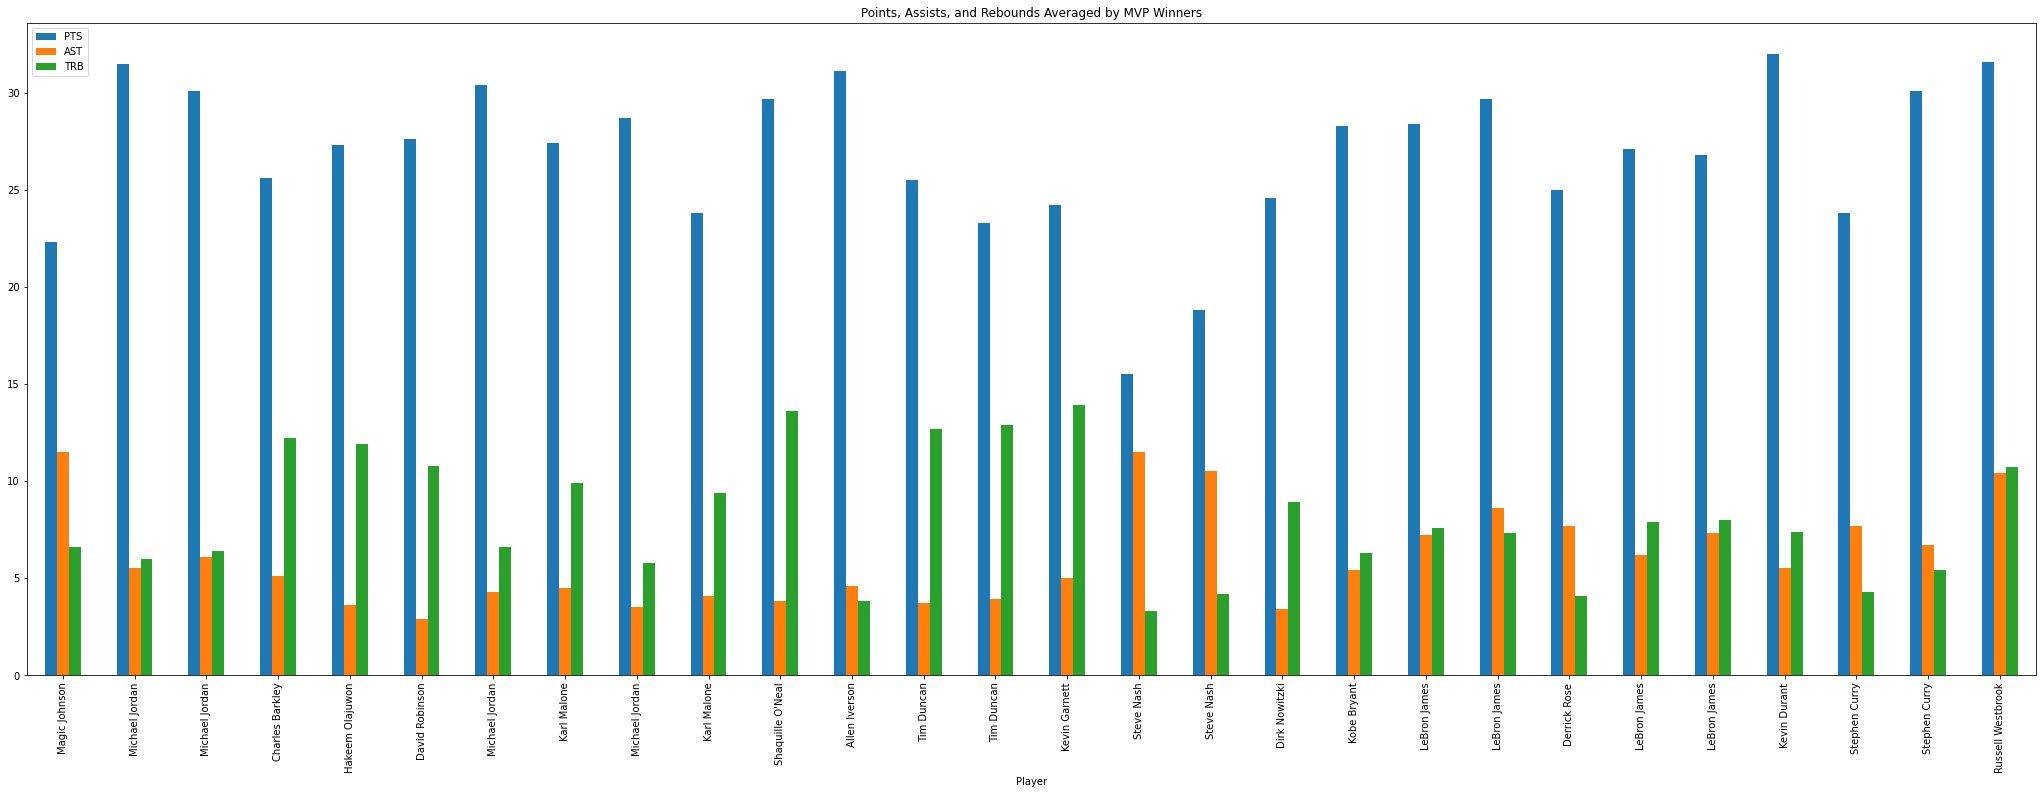

In [567]:

df_mvp = df_mvp_total[df_mvp_total.Rank == 1]

df_mvp.plot(title="Points, Assists, and Rebounds Averaged by MVP Winners",x="Player", y=["PTS", "AST", "TRB"], kind="bar",figsize=(36,12))
plt.show()

Most winners have a very high point average and we see a varying average for rebounds and assists, this makes sense because different positions win the MVP and a point guard will almost certainly have more assists than rebounds, whereas a Center will have more rebounds. But the constant here is a high amount of points, so that should definitely be a factor in determining who the best players are and it confirms we made a good decision in the previous dataset by filtering on points scored.

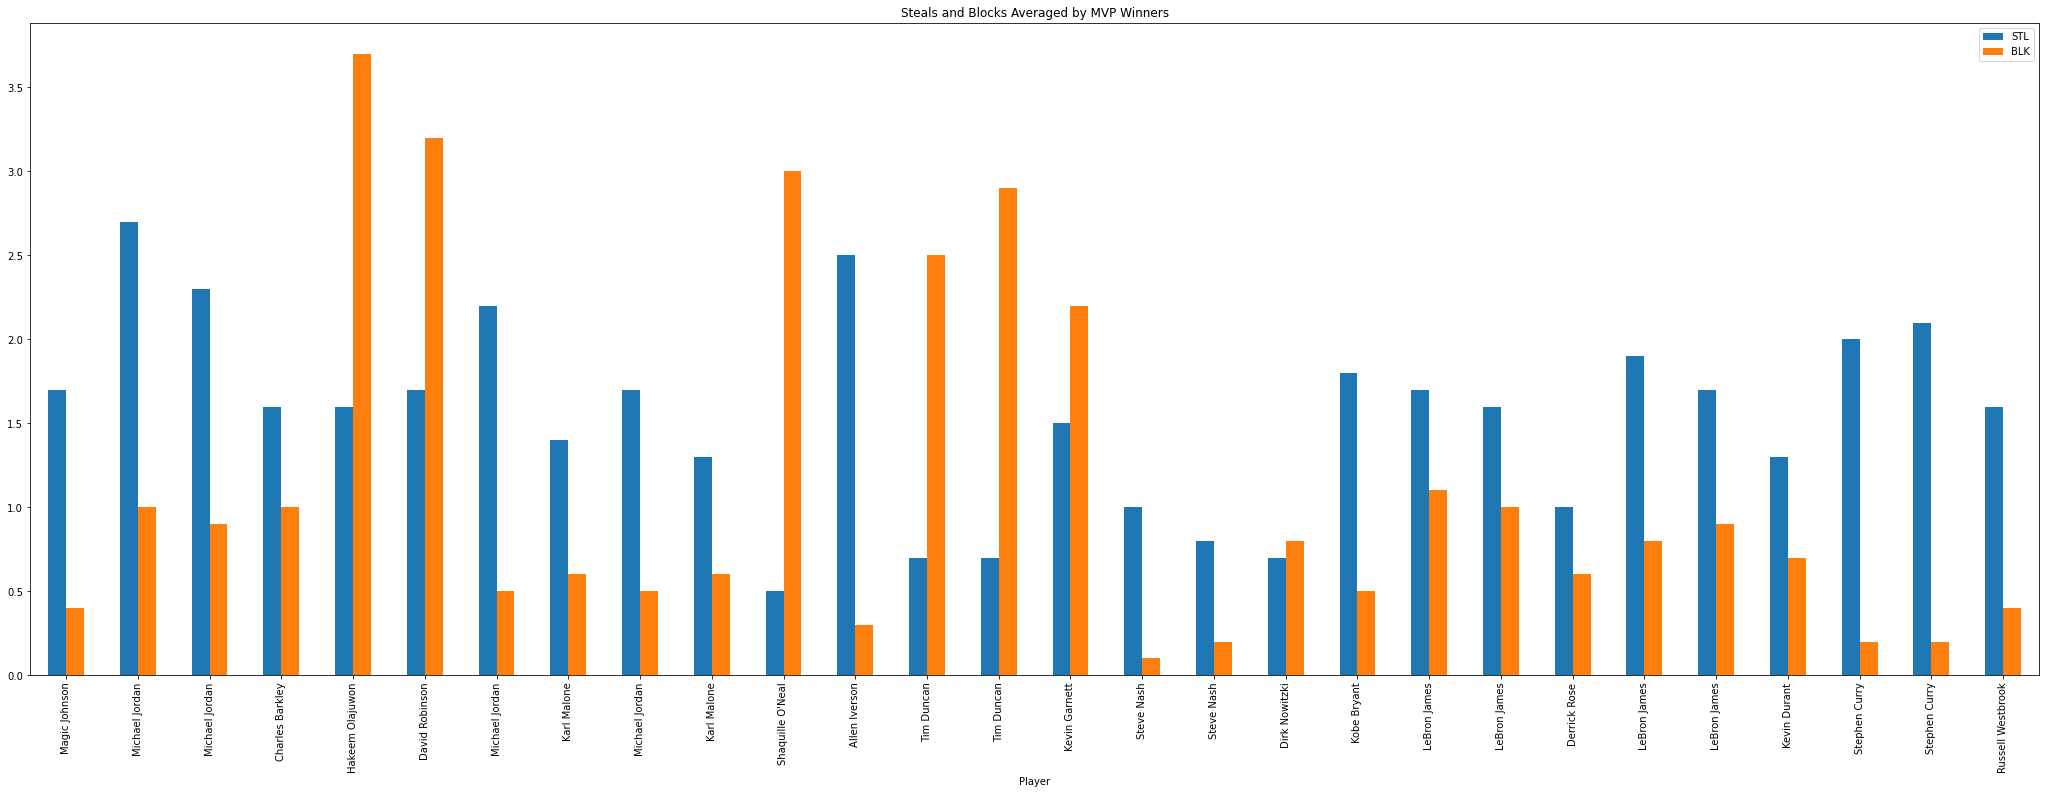

In [568]:
#we can see that most MVPs average well over 20 ppg so they must be able to score, now let's look at the other stats
df_mvp.plot(title="Steals and Blocks Averaged by MVP Winners",x="Player", y=["STL", "BLK"], kind="bar",figsize=(36,12))
plt.show()

Here there is a fair amount of variability, generally there seems to be a consistent amount of steals but some players have a large amount of blocks, though there have been many players to win the award with a low block average.

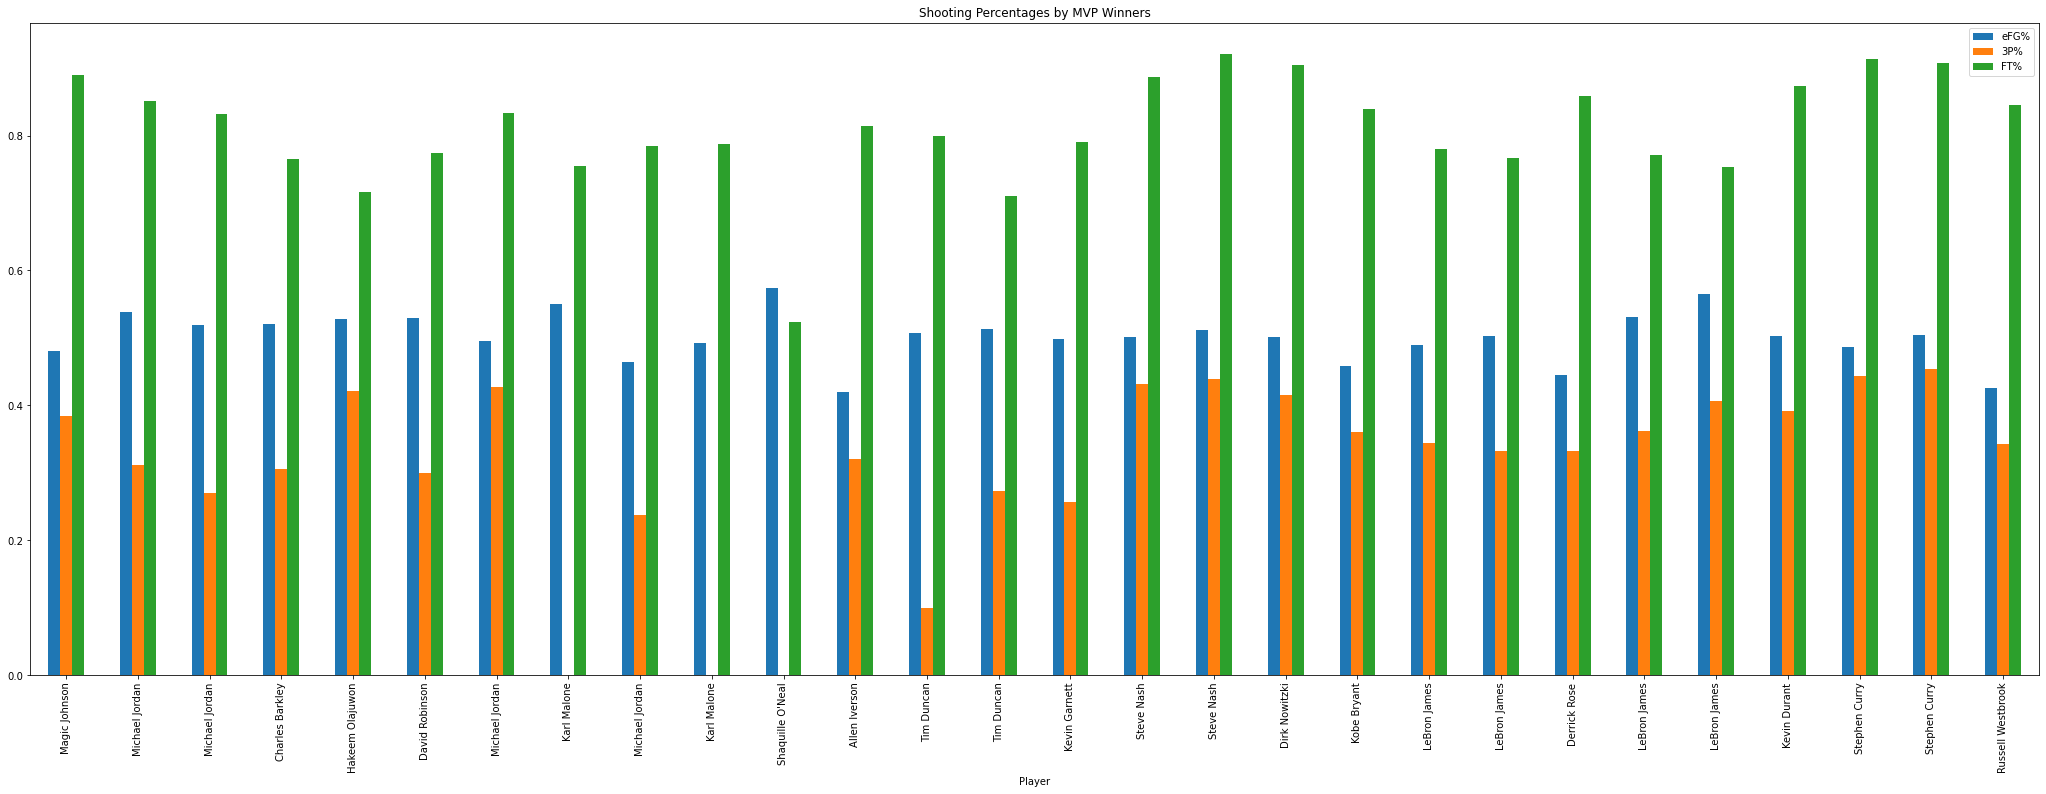

In [569]:
df_mvp.plot(title="Shooting Percentages by MVP Winners",x="Player", y=["eFG%", "3P%","FT%"], kind="bar",figsize=(36,12))
plt.show()

Shooting averages are consistent with Free Throw percentage being above 80% typically and effective field goal percentage being around 40-60%. Three-point percentages are all typically above 30% but lower than 40%. The free throw percentages were missing from 2 players so they were set to 0 for this dataset.

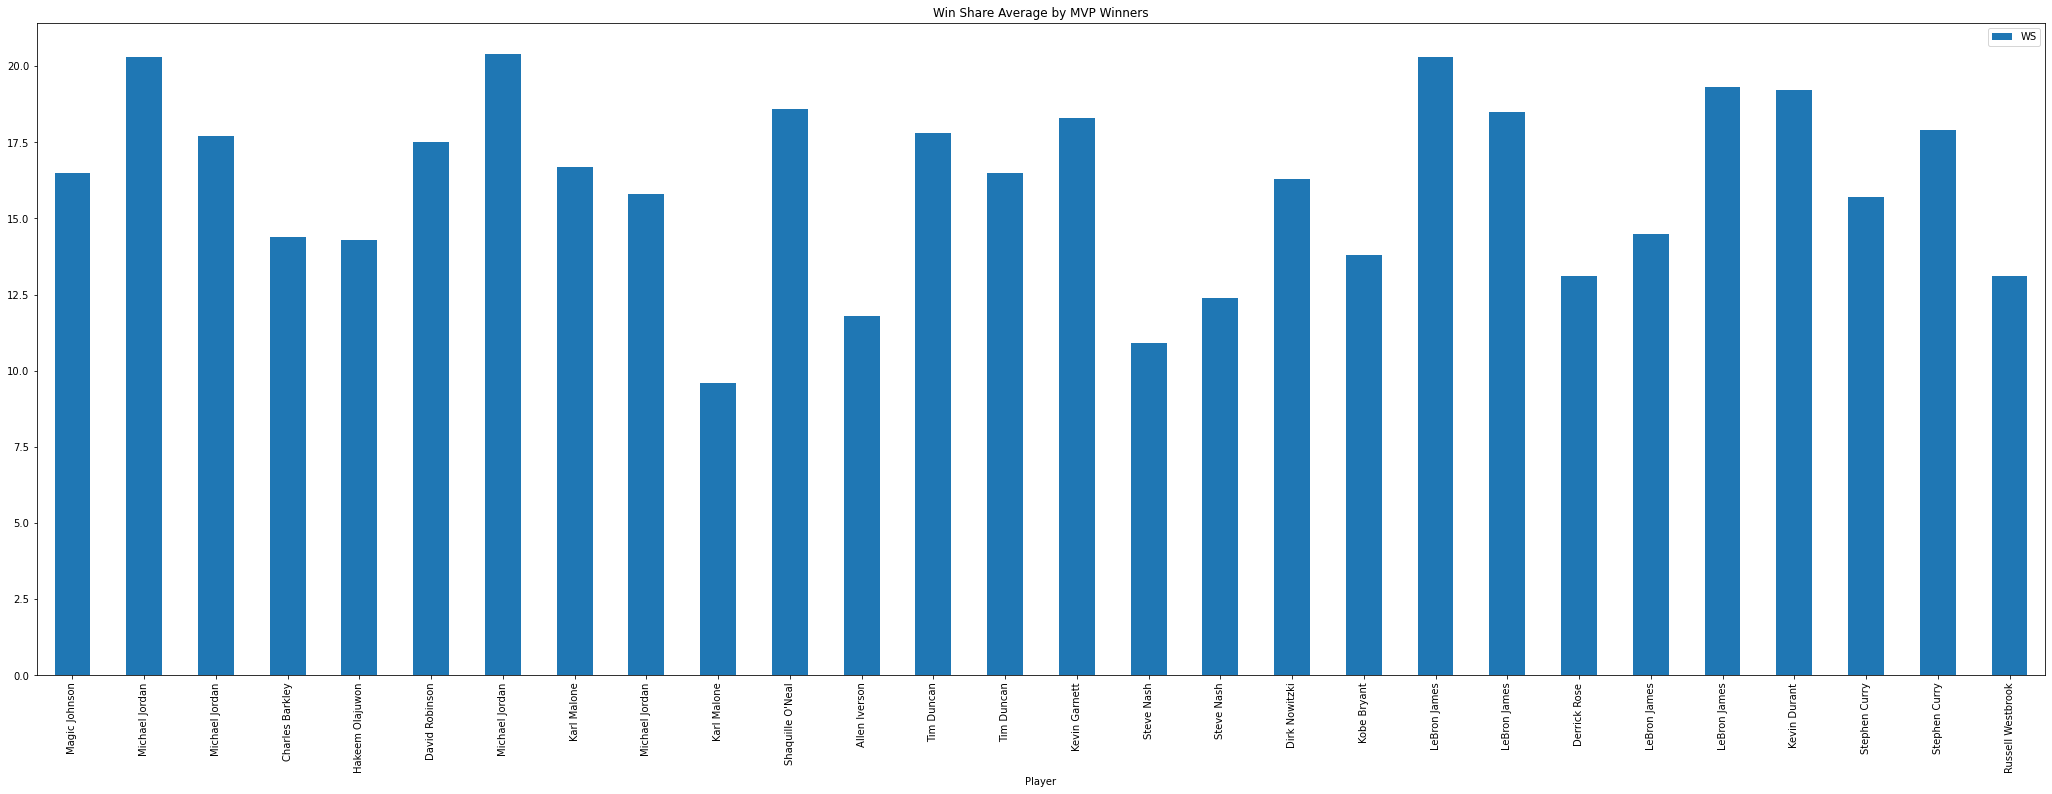

In [570]:
df_mvp.plot(title="Win Share Average by MVP Winners",x="Player", y=["WS"], kind="bar",figsize=(36,12))
plt.show()

Win shares or a player's contribution to the team winning, is very high for all players, this will definitely be a major factor in MVP voting and seems to be the most consistent stat so far.

In [571]:
df_mvp.mean()

Year       2003.500000
Rank       1.000000   
Age        28.142857  
First      85.321429  
Pts Won    1043.642857
Pts Max    1165.714286
Share      0.893393   
G          77.821429  
MP         37.703571  
PTS        26.792857  
TRB        8.139286   
AST        6.078571   
STL        1.546429   
BLK        1.100000   
eFG%       0.502143   
3P%        0.309321   
FT%        0.808857   
WS         16.114286  
WS/48      0.263786   
dtype: float64

Main takeaways here are usually the MVPs have 26+ pts, 8+ rebounds, 6+ assists we will now look at which stats have the most impact on how valuable a player is

## Correlation of Ranking and Stats
Here we will compare the correlation of columns to get an idea as to if there are specific columns that correlate well with rank. Remember the higher the rank the lower the number (1 is the highest rank) so we are looking for the lowest numbers and seeing how much they correlate with rank. Keep in mind, that we are now using our larger dataset that contains all MVP candidates for the years we are looking at, not necessarily all MVP winners like before (otherwise the ranking would just be 1 for all players). One thing to note here as well is that we are only looking at a limited selection of statistics/advanced statistics. In the future, I would like to look at all of the 50+ features in the original dataset, but the stats I'm looking at are the core stats that are tracked and displayed on TV and discussed widely by the national media, the only advanced statistic is Win Shares and I included it beacuse team record was not available and this was the closest equivalent. Also I could have included other awards won (NBA first-team, Defensive player of the year, Finals MVP), perhaps in a future iteration.

In [572]:
corr_stats = df_mvp_total[['Rank','PTS','AST','TRB','STL','BLK','eFG%', '3P%','FT%','WS','WS/48']]
corr_stats = corr_stats.corr()
corr_stats

,Rank,PTS,AST,TRB,STL,BLK,eFG%,3P%,FT%,WS,WS/48
Rank,1.000000,-0.494389,-0.070859,-0.235589,-0.124114,-0.216355,-0.223959,0.053618,0.088350,-0.629216,-0.600621
PTS,-0.494389,1.000000,-0.127742,0.055369,0.126996,0.070762,0.037655,0.122543,0.129743,0.465090,0.341922
AST,-0.070859,-0.127742,1.000000,-0.590414,0.521261,-0.544231,-0.300302,0.378584,0.307524,0.082882,0.067703
TRB,-0.235589,0.055369,-0.590414,1.000000,-0.326427,0.708801,0.490093,-0.540912,-0.564806,0.193165,0.185715
STL,-0.124114,0.126996,0.521261,-0.326427,1.000000,-0.255367,-0.315165,0.238761,0.129505,0.199985,0.118865
BLK,-0.216355,0.070762,-0.544231,0.708801,-0.255367,1.000000,0.458180,-0.533926,-0.500288,0.172606,0.204186
eFG%,-0.223959,0.037655,-0.300302,0.490093,-0.315165,0.458180,1.000000,-0.399352,-0.419757,0.357867,0.445240
3P%,0.053618,0.122543,0.378584,-0.540912,0.238761,-0.533926,-0.399352,1.000000,0.582666,0.062593,0.014218
FT%,0.088350,0.129743,0.307524,-0.564806,0.129505,-0.500288,-0.419757,0.582666,1.000000,0.118870,0.105460
WS,-0.629216,0.465090,0.082882,0.193165,0.199985,0.172606,0.357867,0.062593,0.118870,1.000000,0.845833


Since a smaller number for ranking is actually better we have the inverse of what we would expect, the stats that most correlate with a high ranking are all the most
negative values. The biggest impact seems to be coming from the Win Shares stat (win shares per 48 mins and win shares - win shares is a metric that estimates the number of wins a player produces for his team. Therefore we can say that the team's record will have a big impact on how valuable the player is, this makes sense because a valuable player should be helping their team win games. Points is the second highest correlating factor when looking at rank in MVP voting and for good reason, you win games by having more points than the opposign team. Closely after that is total rebounds, field goal percentage, steals, free throw percentage, assists, and lastly 3pt percentage.

## Isolating Stats
We want to isolate the stats in question of all the players in the MVP race.

In [573]:
df_mvp_total[['Rank','PTS','AST','TRB','STL','BLK','eFG%', '3P%','FT%','WS','WS/48']]

,Rank,PTS,AST,TRB,STL,BLK,eFG%,3P%,FT%,WS,WS/48
0,1,22.3,11.5,6.6,1.7,0.4,0.480,0.384,0.890,16.5,0.270
1,2,25.2,3.9,11.5,1.9,0.6,0.600,0.217,0.749,17.3,0.269
2,3,33.6,6.3,6.9,2.8,0.7,0.526,0.376,0.848,19.0,0.285
3,4,31.0,2.8,11.1,1.5,0.6,0.562,0.372,0.762,15.9,0.245
4,5,28.6,2.2,10.9,1.0,4.0,0.551,0.250,0.775,13.5,0.205
...,...,...,...,...,...,...,...,...,...,...,...
431,7,22.9,5.4,8.8,1.6,1.9,0.521,0.272,0.770,12.4,0.210
432,7,23.1,10.7,4.2,2.0,0.6,0.451,0.327,0.801,8.8,0.149
433,9,28.0,2.1,11.8,1.3,2.2,0.505,0.299,0.802,11.0,0.195
434,9,25.1,4.8,8.3,1.1,1.6,0.537,0.375,0.875,12.0,0.278


## Linear Regession
Given our independent variables (stats) and our dependent variable (rank) we will perform a linear regression and see if we can predict a rank by looking at the stats

In [574]:
#now we can perform a linear regression to look at the correlation between the independent variables and the ranking

X = df_mvp_total[['PTS','AST','TRB','STL','BLK','eFG%', '3P%','FT%','WS','WS/48']]
y = df_mvp_total[['Rank']]
regression = lm.LinearRegression()
model = regression.fit(X,y)
m = model.coef_
b = model.intercept_

print(' y = {0} * x + {1}'.format(m, b))
model.score(X,y)

 y = [[ -0.30495664  -0.43280275  -0.18656938   0.85529812  -0.27877435
   17.82943475   0.9787291   10.21956281  -0.29905324 -33.6922096 ]] * x + [10.56083947]


0.5539809282843418

## Observations
It appears that there is a correlation between our features and rank. However, it is not very strong with an R^2 value of 0.55. This could be for a number of reasons 
does this mean the features are useless? No, but it does mean that MVP rank is more complex than just the base stats we have. It might be a good time to discuss how the 
mvp rankings are actually decided to paint a clearer picture. The MVP award is actually decided by sportswriters and broadcasters, they are selected to be a voter by the 
NBA and then they place their votes. This is entirely subjective, and different people have different biases and motives, so of course this will not be completely objective however a few things to keep in mind - there is very rarely an MVP that is apart of a team with a losing record (win shares are very important) and many times, the MVP is decided based on a storyline in sports media. For example, Russell Westbrook won his first MVP in 2017 because he was able to average a triple double. This was the first time anyone has been able to do so, which is why he won the MVP, however, when he continued to do so he did not win the MVP award in the following seasons.
Part of the reason is because the first time he did it, it was novel. But after that the novelty wore off. Additionally, there are some seasons where the consensus
'best' player does not win the MVP, Michael Jordan is widely considered the best player of all time and the best player of his era. But he did not win the MVP every
year of his dominance. This can be attributed to voter exhaustion. Having won so many MVPs, voters were tired of voting for the same player and in turn voted for someone
else. These and many other factors are things that I am unable to track and account for in the analysis, but I think they are worth pointing out for better understanding
of the results.


## Hypothesis Testing using Ordinary Least Squares Regression

We can now conduct our hypothesis testing first we can state our null hypothesis: all of the attributes used do not have an impact on rating our significance level will be 0.05 and now we need our test statistic and p-values to decided if we reject or do not reject the null hypothesis

In [575]:


#add a constant to the features
X = sm.add_constant(X)

# use Ordinary Least Squares
OLS_model = sm.OLS(y,X).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     52.79
Date:                Mon, 20 Dec 2021   Prob (F-statistic):           2.62e-68
Time:                        15:07:07   Log-Likelihood:                -1102.0
No. Observations:                 436   AIC:                             2226.
Df Residuals:                     425   BIC:                             2271.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5608      3.467      3.046      0.002       3.746      17.376
PTS           -0.3050      0.035     -8.762      0.000      -0.373      -0.237
AST           -0.4328      0.081     -5.376      0.000      -0.591      -0.275
TRB           -0.1866      0.076     -2.446      0.015      -0.337      -0.037
STL            0.8553      0.344      2.485      0.013       0.179       1.532
BLK           -0.2788      0.237     -1.176      0.240      -0.745       0.187
eFG%          17.8294      4.855      3.673      0.000       8.287      27.372
3P%            0.9787      1.455      0.673      0.501      -1.881       3.838
FT%           10.2196      2.313      4.418      0.000       5.673      14.766
WS            -0.2991      0.090     -3.310      0.001      -0.477      -0.121
WS/48        -33.6922      6.269     -5.375      0.000     -46.014     -21.370
==============================================================================
Omnibus:                        4.800   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.562
Skew:                           0.229   Prob(JB):                        0.102
Kurtosis:                       3.204   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It looks like our p-values for all statistics are less than the level of significance and so we can reject the null hypothesis. The only exceptions are blocks.

In [576]:
print("Parameters: ", OLS_model.params)
print("R2: ", OLS_model.rsquared)


Parameters:  const    10.560839
PTS     -0.304957 
AST     -0.432803 
TRB     -0.186569 
STL      0.855298 
BLK     -0.278774 
eFG%     17.829435
3P%      0.978729 
FT%      10.219563
WS      -0.299053 
WS/48   -33.692210
dtype: float64
R2:  0.5539809282843418


## Looking at Influential Factors
looking at the results it's clear that the biggest influencer is WS/48 followed by Assists, points, Win shares, blocks, and total rebounds. Remember, since we are looking at rank, the lower the better. It appears that Steals, percentages, do not have a big influence meaning that perhaps efficiency is not as important when determining the most valuable player.

## Split Data Up, Train and Predict
First we will isolate the data we want, add a constant and then split our data up into a training set and testing set. I used a 50/50 split, as I tried using a 20/80 split before and it seemed like it was just not enough data to train on to get a good result. With a larger dataset of MVP data, I would have been able to lower the ratio. I used linear regression from sklearn to perform this.

In [577]:
#now for our predictions given the data that we have
#train data and run a linear regression
X =  df_mvp_total[['PTS','AST','TRB','BLK','WS','WS/48']]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)


regressor = lm.LinearRegression()  
regressor.fit(X_train, y_train)

m = regressor.coef_
b = regressor.intercept_
print(' y = {0} * x + {1}'.format(m, b))

print(X)

 y = [[  0.          -0.24947552  -0.33567765  -0.1970316   -0.34066228
   -0.26544289 -27.86122782]] * x + [25.86907988]
     const   PTS   AST   TRB  BLK    WS  WS/48
0    1.0    22.3  11.5  6.6   0.4  16.5  0.270
1    1.0    25.2  3.9   11.5  0.6  17.3  0.269
2    1.0    33.6  6.3   6.9   0.7  19.0  0.285
3    1.0    31.0  2.8   11.1  0.6  15.9  0.245
4    1.0    28.6  2.2   10.9  4.0  13.5  0.205
..   ...     ...  ...    ...  ...   ...    ...
431  1.0    22.9  5.4   8.8   1.9  12.4  0.210
432  1.0    23.1  10.7  4.2   0.6  8.8   0.149
433  1.0    28.0  2.1   11.8  2.2  11.0  0.195
434  1.0    25.1  4.8   8.3   1.6  12.0  0.278
435  1.0    27.3  3.9   5.2   0.2  9.0   0.166

[436 rows x 7 columns]


In [578]:
predictions = regressor.predict(X_test)
print(predictions)

[[ 6.92950854]
 [11.08472685]
 [ 8.57847443]
 [12.69372877]
 [ 7.13961795]
 [12.40903459]
 [ 3.04644456]
 [ 8.71741554]
 [ 8.40931877]
 [14.85985871]
 [13.44434716]
 [ 9.33572362]
 [10.45608331]
 [ 8.93303736]
 [ 8.99529402]
 [ 6.35485197]
 [ 9.3036312 ]
 [ 7.23288233]
 [ 8.22851778]
 [ 3.92813694]
 [ 7.40267834]
 [13.44913944]
 [ 7.25345016]
 [ 9.57890798]
 [ 8.29662713]
 [12.15400457]
 [ 8.98844223]
 [12.64780236]
 [ 2.53188591]
 [12.8208062 ]
 [ 3.71606084]
 [10.95727946]
 [ 5.5183066 ]
 [10.11822468]
 [ 4.8542824 ]
 [ 7.73640094]
 [ 7.97097266]
 [ 9.47782587]
 [ 0.2465662 ]
 [12.42904984]
 [ 7.6174213 ]
 [ 5.09785996]
 [10.22690274]
 [14.15070236]
 [ 6.40144832]
 [11.17524387]
 [ 9.74050789]
 [ 9.05453206]
 [ 4.30494179]
 [ 9.16354691]
 [ 3.91875502]
 [ 6.81994503]
 [ 6.37280772]
 [ 9.68542628]
 [ 5.39617634]
 [ 7.18786561]
 [ 6.71491784]
 [12.55685373]
 [12.00298294]
 [ 8.30822409]
 [ 9.16126741]
 [ 7.52142444]
 [ 8.70658312]
 [ 7.6144239 ]
 [ 6.24105798]
 [ 9.81831982]
 [ 9.98715

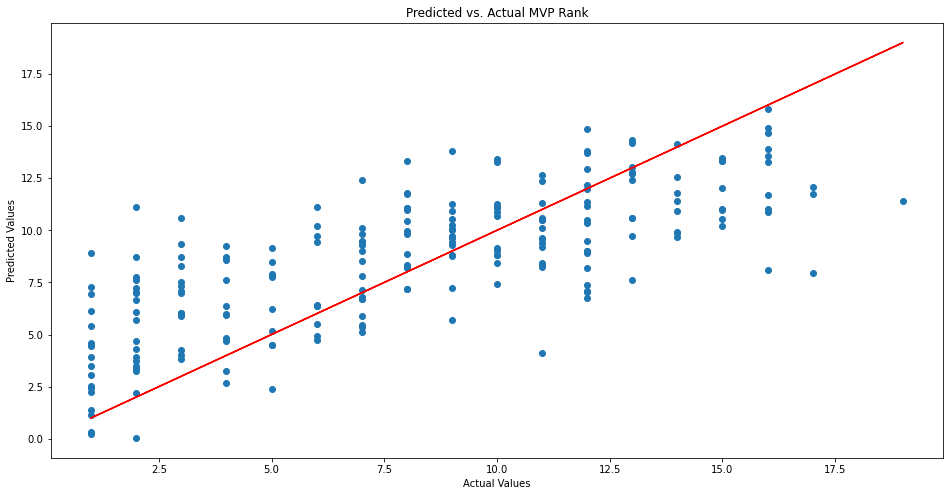

In [579]:
plt.figure(figsize=(16,8))
plt.title("Predicted vs. Actual MVP Rank")
plt.scatter(y_test,predictions)
plt.plot(y_test, y_test, color="Red")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

Here it looks like the overall pattern of data isn't entirely linear, it is spaced out and might lend itself better to a non-linear method which we will explore later. However, it isn't useless, there appears to be a loose correlation between our stats and the MVP rank so we will continue.

In [580]:
print("Coefficient of determination of the prediction: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination of the prediction: 0.5333982330444116


Our score is not very high, so maybe we can explore a different method.

## Non-Linear Approach
Because the linear approach wasn't as accurate as we would like, we will now explore a non-linear approach to see if it does any better. We will be using a random forest. The reason I chose a random forest was because it's a robust method that includes plenty of randomness so we can avoid overfitting. 

We will create our classifier and then train our model and test it as we did before.

In [581]:
clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
clf = clf.fit(X_train, y_train)


print(clf.predict(X_test))
print(X_test)

print(grouped[['PTS','AST','TRB','STL','BLK','eFG%', '3P%','FT%','WS','WS/48']])

<ipython-input-581-d85506ffe0a8>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = clf.fit(X_train, y_train)


[ 6 10  7 16 11 12  5  5 11 14 11  4 10  4 10  3  4  5  9  3  4 12  5 11
 10 17 10 10  4 17  1 16  5 15  4  9  6 14  1 12  9  4  4 12  5 11  6 10
  1 11  4  6  6 14  4  5  7 12 12  6  4  6 12 11  6  8  7  2 15  3 12  6
  9  8  9 14  4  5 17 10 11  8  3  8 13  6  7  5  7  5  6 10 12 10  3  6
  9  9 15 10 12 10  3  1  6 11 12  1 12 14 13 12  5  8 11  3 16  7 11  2
 10  4  1  4  9  2  1  6 10 11  5  4  6 10 11  1  8  2  9 10  8 15  6 10
 10  6 11  8 14 13 10  9 10  1  9  5  3  6  2 14 14 11 13  8  9  7  1  5
  4 12  3  1  3 12  9 10  8  6 10  6 11  1 10  5  4 11 15 13 10 12  1  8
  1 11 14  9 12 16  3  3  1 16 10 11 11 13 13  4  7  9  3 12 14  4  4  5
  5  3]
     const   PTS  AST   TRB  BLK    WS  WS/48
153  1.0    23.8  4.1  9.4   0.6  9.6   0.252
393  1.0    21.8  2.1  10.8  1.1  7.8   0.146
54   1.0    24.2  1.9  12.1  2.0  10.6  0.170
188  1.0    18.1  2.3  3.0   0.3  10.1  0.162
196  1.0    23.2  4.5  8.3   0.8  13.1  0.217
..   ...     ...  ...  ...   ...   ...    ...
29   1.0    2

In [582]:
clf.score(X_test, y_test)

0.14220183486238533

Our predictions don't match up very well to our testing data and so it seems best to go with our original linear approach.

## Top 10 List
Now that we have settled for our best approach, it's time to take our old dataset with career stats compiled into one dataframe and see what we get in terms of the lowest ranking. We will take the model that we trained with the previous dataset and predict the values of our now current dataset. This will have career stats so given the entire careers of players we will see who ranks the highest when using the standards of MVP voting over the last 30 years.

In [594]:
#now let's predict the top 10 players of all time given our original dataset with career stats compiled into one dataframe we can plug that in and see what we get out
new_X = grouped[['PTS','AST','TRB','BLK','WS','WS/48']]
new_X = sm.add_constant(new_X)
predictions = regressor.predict(new_X)
#print(predictions)

new_X['predictions'] = 0.0
predictions = predictions.flatten()
counter =0

for index, row in new_X.iterrows():
    new_X.at[index, 'predictions'] = predictions[counter]
    counter = counter +1

    
new_X.sort_values(by=['predictions'])
finalTable = grouped.merge(new_X, how='outer', on='PTS')

display((finalTable.sort_values(by=['predictions'])).head(10))

,Player,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB_x,AST_x,STL,BLK_x,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS_x,WS/48_x,VORP,FG%,3P%,2P%,eFG%,FT%,PPG,TRBG,ASTG,BLKG,const,AST_y,TRB_y,BLK_y,WS_y,WS/48_y,predictions
31,LeBron James,1061.0,1060.0,41272.0,10423.0,20803.0,1467.0,4295.0,8956.0,16508.0,6474.0,8752.0,1289.0,6418.0,7.263902,7.032045,0.0,0.770028,3619.0,1977.0,27.131951,27.700000,0.585500,0.206000,0.419286,3.750000,18.000000,10.992857,35.178571,2.235714,1.557143,12.935714,31.550000,10.271429,4.400000,14.685714,0.240571,8.285714,0.503571,0.342143,0.546143,0.538929,0.739071,27.131951,0.0,0.0,0.0,1.0,7.032045,7.263902,0.770028,14.685714,0.240571,4.445450
33,Michael Jordan*,1072.0,1039.0,41011.0,12192.0,24537.0,581.0,1778.0,11611.0,22759.0,7327.0,8772.0,1668.0,5004.0,6.223881,5.254664,0.0,0.833022,2924.0,2783.0,30.123134,27.373333,0.559467,0.070933,0.354000,4.700000,14.080000,9.380000,24.806667,3.100000,1.466667,9.293333,33.600000,9.993333,4.280000,14.260000,0.236600,6.966667,0.488267,0.283933,0.500667,0.500000,0.830933,30.123134,0.0,0.0,0.0,1.0,5.254664,6.223881,0.833022,14.260000,0.236600,4.702959
12,David Robinson*,987.0,985.0,34271.0,7365.0,14221.0,25.0,100.0,7340.0,14121.0,6035.0,8201.0,3083.0,7414.0,10.635258,2.473151,0.0,2.992908,2417.0,2835.0,21.063830,26.050000,0.576429,0.005214,0.587429,10.985714,23.628571,17.564286,11.950000,2.085714,5.471429,11.771429,26.085714,7.035714,5.721429,12.771429,0.246071,5.778571,0.513000,0.152000,0.514571,0.513643,0.723000,21.063830,0.0,0.0,0.0,1.0,2.473151,10.635258,2.992908,12.771429,0.246071,6.422999
27,Kevin Durant,703.0,703.0,26278.0,6463.0,13254.0,1260.0,3321.0,5203.0,9933.0,4935.0,5596.0,553.0,4478.0,7.156472,3.788051,0.0,1.049787,2221.0,1330.0,27.199147,25.410000,0.610200,0.257500,0.413500,2.390000,18.630000,10.860000,18.760000,1.590000,2.180000,12.320000,30.060000,8.500000,3.480000,11.990000,0.221400,4.690000,0.490500,0.378400,0.531600,0.539500,0.878100,27.199147,0.0,0.0,0.0,1.0,3.788051,7.156472,1.049787,11.990000,0.221400,6.693185
30,Larry Bird*,897.0,870.0,34443.0,8591.0,17334.0,649.0,1727.0,7942.0,15607.0,3960.0,4471.0,1757.0,7217.0,10.004459,6.348941,0.0,0.841695,2816.0,2279.0,24.293200,23.076923,0.558462,0.097154,0.248615,5.392308,22.353846,14.238462,24.792308,2.100000,1.261538,12.553846,26.400000,6.669231,4.538462,11.223077,0.195154,6.123077,0.491154,0.351083,0.503462,0.509462,0.891385,24.293200,0.0,0.0,0.0,1.0,6.348941,10.004459,0.841695,11.223077,0.195154,7.003084
25,Karl Malone*,1476.0,1471.0,54852.0,13528.0,26210.0,85.0,310.0,13443.0,25900.0,9787.0,13188.0,3562.0,11406.0,10.140921,3.555556,0.0,0.775745,4524.0,4578.0,25.018970,23.642105,0.573526,0.010895,0.505526,7.742105,23.515789,15.894737,17.731579,1.947368,1.431579,12.684211,29.115789,7.489474,4.873684,12.347368,0.202789,5.400000,0.512895,0.201158,0.515737,0.514474,0.734474,25.018970,0.0,0.0,0.0,1.0,3.555556,10.140921,0.775745,12.347368,0.202789,7.244105
8,Charles Barkley*,1073.0,1012.0,39330.0,8435.0,15605.0,538.0,2020.0,7897.0,13585.0,6349.0,8643.0,4260.0,8286.0,11.692451,3.928239,0.0,0.827586,3376.0,3287.0,22.140727,24.193750,0.602812,0.126812,0.549625,12.512500,23.962500,18.337500,17.693750,2.018750,1.306250,14.812500,24.531250,7.712500,3.375000,11.068750,0.211063,5.850000,0.532750,0.244250,0.572125,0.549500,0.727937,22.140727,0.0,0.0,0.0,1.0,3.928239,11.692451,0.827586,11.068750,0.211063,7.622597
20,James Harden,615.0,402.0,20688.0,4005.0,9053.0,1382.0,3801.0,2623.0,5252.0,4226.0,4951.0,475.0,2618.0,5.029268,5.733333,0.0,0.445528,2068.0,1564.0,22.143089,22.162500,0.605375,0.426125,0.537625,2.612500,13.650000,8.237500,27.262500,2.187500,1.012500,14.962500,27.037500,8.600000,2.812500,11.400000,0.206375,5.212500,0.442875,0.366125,0.501625,0.520625,0.848625,22.143089,0.0,0.0,0.0,1.0,5.733333,5.029268,0.445528,11.400000,0.206375,8.501760
39,Stephen Curry,574.0,568.0,19897.0,4589.0,9645.0,1917.0,4379.0,2672.0,5266.0,1993.0,2212.0,405.0,2097.0,4.358885,6.822300,0.0,0.2108

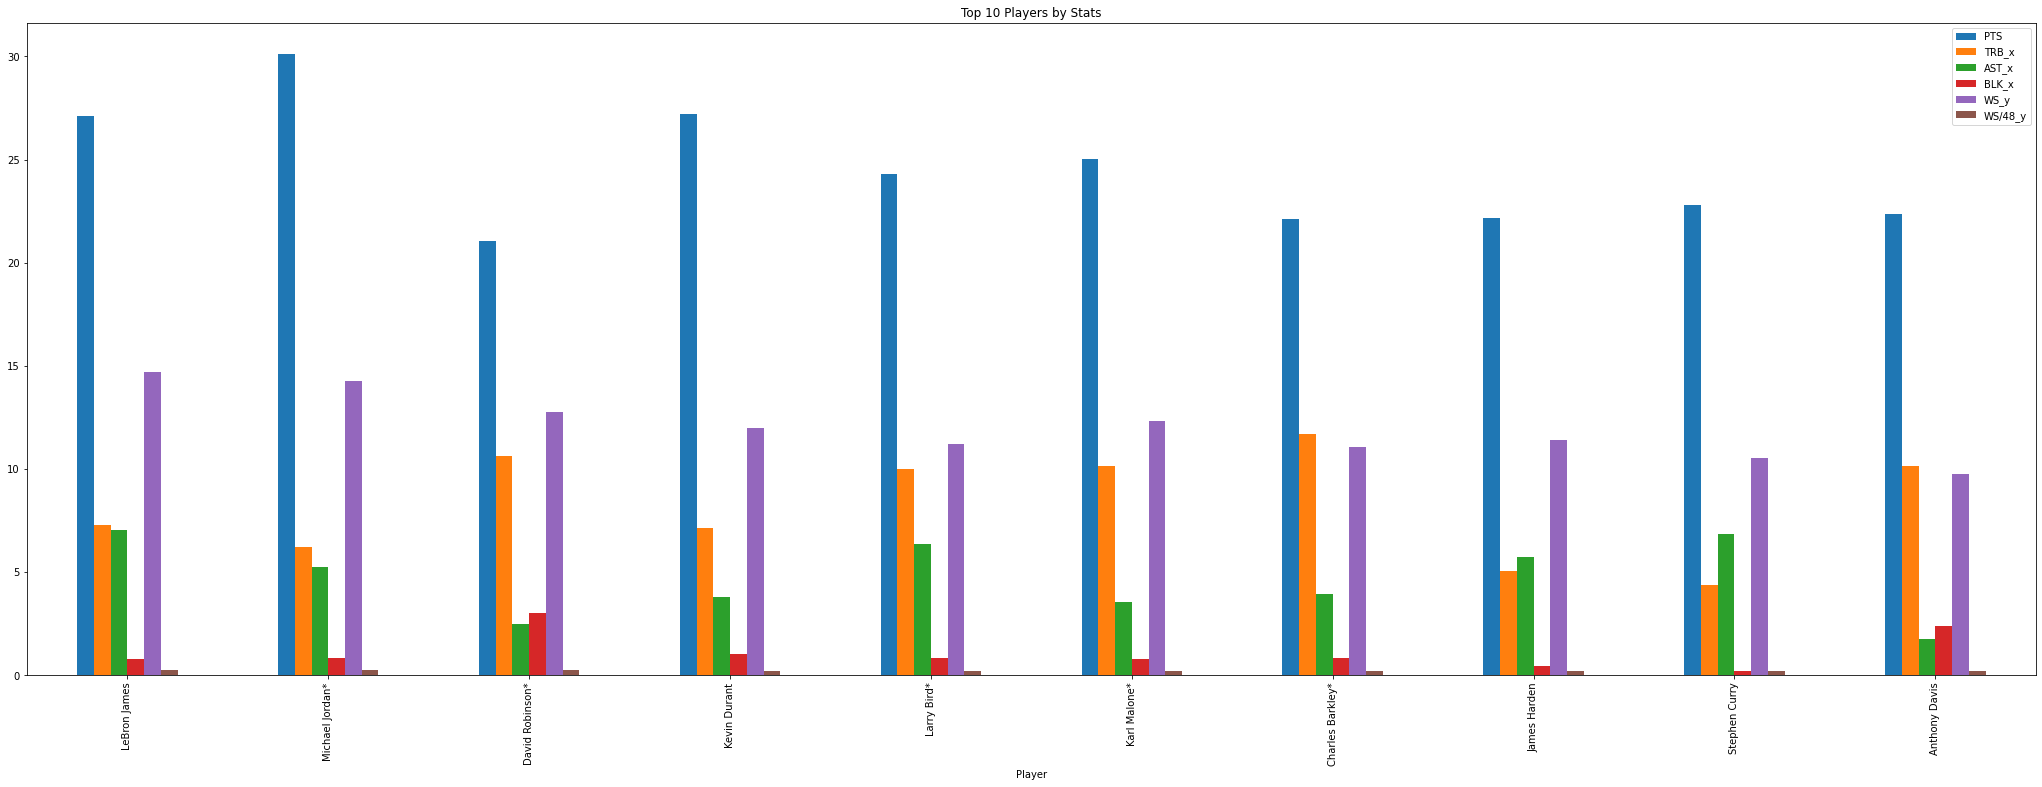

In [599]:
finalTable.sort_values(by=['predictions']).head(10).plot(title="Top 10 Players by Stats",x="Player", y=["PTS", "TRB_x","AST_x","BLK_x", "WS_y","WS/48_y"], kind="bar",figsize=(36,12))
plt.show()

## Conclusions

This list has LeBron James as the number 1 player with Michael Jordan at second. From a statistical point of view, LeBron has the best combination of win shares, points, rebounds and assists. While Michael was able to have a higher point average, his win shares were slightly lower and his rebounds and assists were lower as well. However, Jordan was better in some of the defensive stats, whereas leBron has the advantage in efficiency (shooting percentages) in every category except FT%. The rest of the players all have high win shares and different variations of points, rebounds and assists, but from a high-level actually have a good mix of old and new players. One factor that many will bring up is longevity and the ability to perform at a high level consistenly for many seasons. That is one thing this list doesn't take into account in a meaningful way and why there are more new players in it than some traditional lists. Also, for the newer players, they are not all finished playing, so their averages could go up and down and will affect their position on the list in the future.

This is a respectable list and though it differs from my personal opinion, there were some interesting takeaways when building this. First, was the breakdown of the stats and which ones impacted the rank the most. Interestingly it wasn't points, it was an advanced statistic called win shares per 48 which is a metric that estimates the number of wins a player produces for their team. This makes sense as winning games is the ultimate goal and the ability to provide your team with wins on a 48 minute basis analyzes the most efficient helpful players. This is backed up by history as only 2 players have ever won the MVP award with a team that had a losing record. Other important stats were points scored per game rebounds, assists, and blocks. 

Interestingly, stats such as percentages (field goal percentage) were not big influencers and point to the idea that players don't necessarily have to be the most efficient to be the most valuable player, they need to have output and win games. In the end, the players with the highest win shares and highest point, rebound and assist averages topped the list. Another interesting find was that there were many players with high point averages that did not have a high win share per 48. This would indicate that although the player was scoring points they were not helping their team win, this could be because they are very inefficient when it comes to scoring, that they are able to score but do not make their team better, or that their surrounding team is not very good.

Another observation during the linear regression analysis was the low R-squared value, this indicates that our predicted values don't correlate exactly with the actual values. This was one of the reasons I decided to go with a non-linear method as well and use a random forest to attempt to come up with a top 10 list, however this as well did not result in the highest accuracy either given my inputs. The lack of correlation could be due to a number of factors. A plausible explanation is that the MVP award is decided by the media and they don't always vote for the statistically best player, it is a subjective decision sometimes and things like season-long storylines and biases will affect who votes for who. Regardless, it must be acknowledged that this analysis is not perfect and the correlation does not indicate that the features predict the MVP rank perfectly, however, I think the analysis shows each of the stats previously mentioned are significant and do influence how valuable a player is in the eyes of the media. If I had more time, I would have liked to explore different hyperparameters and other machine learning techniques to see if I could get a better predictive method.

## Top 10 List with Non-Linear Approach
Just for fun, we can look at the same list but using the non-linear model that we tried previously just to see the results. 

In [600]:
#now let's predict the top 10 players of all time given our original dataset with career stats compiled into one dataframe we can plug that in and see what we get out

new_X = grouped[['PTS','AST','TRB','BLK','WS','WS/48']]
new_X = sm.add_constant(new_X)
predictions = clf.predict(new_X)
#print(predictions)

new_X['predictions'] = 0.0
predictions = predictions.flatten()
counter =0

for index, row in new_X.iterrows():
    new_X.at[index, 'predictions'] = predictions[counter]
    counter = counter +1

    
new_X.sort_values(by=['predictions'])
finalTable = grouped.merge(new_X, how='outer', on='PTS')
display((finalTable.sort_values(by=['predictions'])).head(10))

,Player,G,GS,MP,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,TRB_x,AST_x,STL,BLK_x,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS_x,WS/48_x,VORP,FG%,3P%,2P%,eFG%,FT%,PPG,TRBG,ASTG,BLKG,const,AST_y,TRB_y,BLK_y,WS_y,WS/48_y,predictions
30,Larry Bird*,897.0,870.0,34443.0,8591.0,17334.0,649.0,1727.0,7942.0,15607.0,3960.0,4471.0,1757.0,7217.0,10.004459,6.348941,0.0,0.841695,2816.0,2279.0,24.293200,23.076923,0.558462,0.097154,0.248615,5.392308,22.353846,14.238462,24.792308,2.100000,1.261538,12.553846,26.400000,6.669231,4.538462,11.223077,0.195154,6.123077,0.491154,0.351083,0.503462,0.509462,0.891385,24.293200,0.0,0.0,0.0,1.0,6.348941,10.004459,0.841695,11.223077,0.195154,3.0
31,LeBron James,1061.0,1060.0,41272.0,10423.0,20803.0,1467.0,4295.0,8956.0,16508.0,6474.0,8752.0,1289.0,6418.0,7.263902,7.032045,0.0,0.770028,3619.0,1977.0,27.131951,27.700000,0.585500,0.206000,0.419286,3.750000,18.000000,10.992857,35.178571,2.235714,1.557143,12.935714,31.550000,10.271429,4.400000,14.685714,0.240571,8.285714,0.503571,0.342143,0.546143,0.538929,0.739071,27.131951,0.0,0.0,0.0,1.0,7.032045,7.263902,0.770028,14.685714,0.240571,3.0
0,Adrian Dantley*,1030.0,613.0,36690.0,8673.0,16157.0,7.0,42.0,8666.0,16115.0,7357.0,9017.0,2338.0,3467.0,5.635922,3.019417,0.0,0.166990,2894.0,2754.0,23.990291,20.488889,0.600000,0.006643,0.565611,7.066667,9.677778,8.400000,12.755556,1.322222,0.261111,12.355556,25.122222,6.572222,1.416667,8.011111,0.177833,2.600000,0.519944,0.132727,0.520889,0.520500,0.808611,23.990291,0.0,0.0,0.0,1.0,3.019417,5.635922,0.166990,8.011111,0.177833,4.0
12,David Robinson*,987.0,985.0,34271.0,7365.0,14221.0,25.0,100.0,7340.0,14121.0,6035.0,8201.0,3083.0,7414.0,10.635258,2.473151,0.0,2.992908,2417.0,2835.0,21.063830,26.050000,0.576429,0.005214,0.587429,10.985714,23.628571,17.564286,11.950000,2.085714,5.471429,11.771429,26.085714,7.035714,5.721429,12.771429,0.246071,5.778571,0.513000,0.152000,0.514571,0.513643,0.723000,21.063830,0.0,0.0,0.0,1.0,2.473151,10.635258,2.992908,12.771429,0.246071,4.0
33,Michael Jordan*,1072.0,1039.0,41011.0,12192.0,24537.0,581.0,1778.0,11611.0,22759.0,7327.0,8772.0,1668.0,5004.0,6.223881,5.254664,0.0,0.833022,2924.0,2783.0,30.123134,27.373333,0.559467,0.070933,0.354000,4.700000,14.080000,9.380000,24.806667,3.100000,1.466667,9.293333,33.600000,9.993333,4.280000,14.260000,0.236600,6.966667,0.488267,0.283933,0.500667,0.500000,0.830933,30.123134,0.0,0.0,0.0,1.0,5.254664,6.223881,0.833022,14.260000,0.236600,6.0
8,Charles Barkley*,1073.0,1012.0,39330.0,8435.0,15605.0,538.0,2020.0,7897.0,13585.0,6349.0,8643.0,4260.0,8286.0,11.692451,3.928239,0.0,0.827586,3376.0,3287.0,22.140727,24.193750,0.602812,0.126812,0.549625,12.512500,23.962500,18.337500,17.693750,2.018750,1.306250,14.812500,24.531250,7.712500,3.375000,11.068750,0.211063,5.850000,0.532750,0.244250,0.572125,0.549500,0.727937,22.140727,0.0,0.0,0.0,1.0,3.928239,11.692451,0.827586,11.068750,0.211063,6.0
35,Moses Malone*,1247.0,784.0,42565.0,9046.0,18415.0,8.0,80.0,9038.0,18335.0,8226.0,10650.0,6294.0,8846.0,12.141139,1.368885,0.0,1.244587,3804.0,2801.0,21.111468,21.283333,0.556556,0.008250,0.607722,16.622222,22.961111,19.788889,6.272222,1.083333,2.183333,14.666667,25.055556,5.955556,2.850000,8.800000,0.160833,2.238889,0.470444,0.107000,0.471667,0.471444,0.768778,21.111468,0.0,0.0,0.0,1.0,1.368885,12.141139,1.244587,8.800000,0.160833,7.0
25,Karl Malone*,1476.0,1471.0,54852.0,13528.0,26210.0,85.0,310.0,13443.0,25900.0,9787.0,13188.0,3562.0,11406.0,10.140921,3.555556,0.0,0.775745,4524.0,4578.0,25.018970,23.642105,0.573526,0.010895,0.505526,7.742105,23.515789,15.894737,17.731579,1.947368,1.431579,12.684211,29.115789,7.489474,4.873684,12.347368,0.202789,5.400000,0.512895,0.201158,0.515737,0.514474,0.734474,25.018970,0.0,0.0,0.0,1.0,3.555556,10.140921,0.775745,12.347368,0.202789,7.0
10,Damian Lillard,396.0,396.0,14399.0,2975.0,6914.0,1042.0,2817.0,1933.0,4097.0,1888.0,2154.0,217.0,1376.0,4.022727,6.176768,0.0,0.277778,1097.0,850.0,22.424242,20.400000,0.564

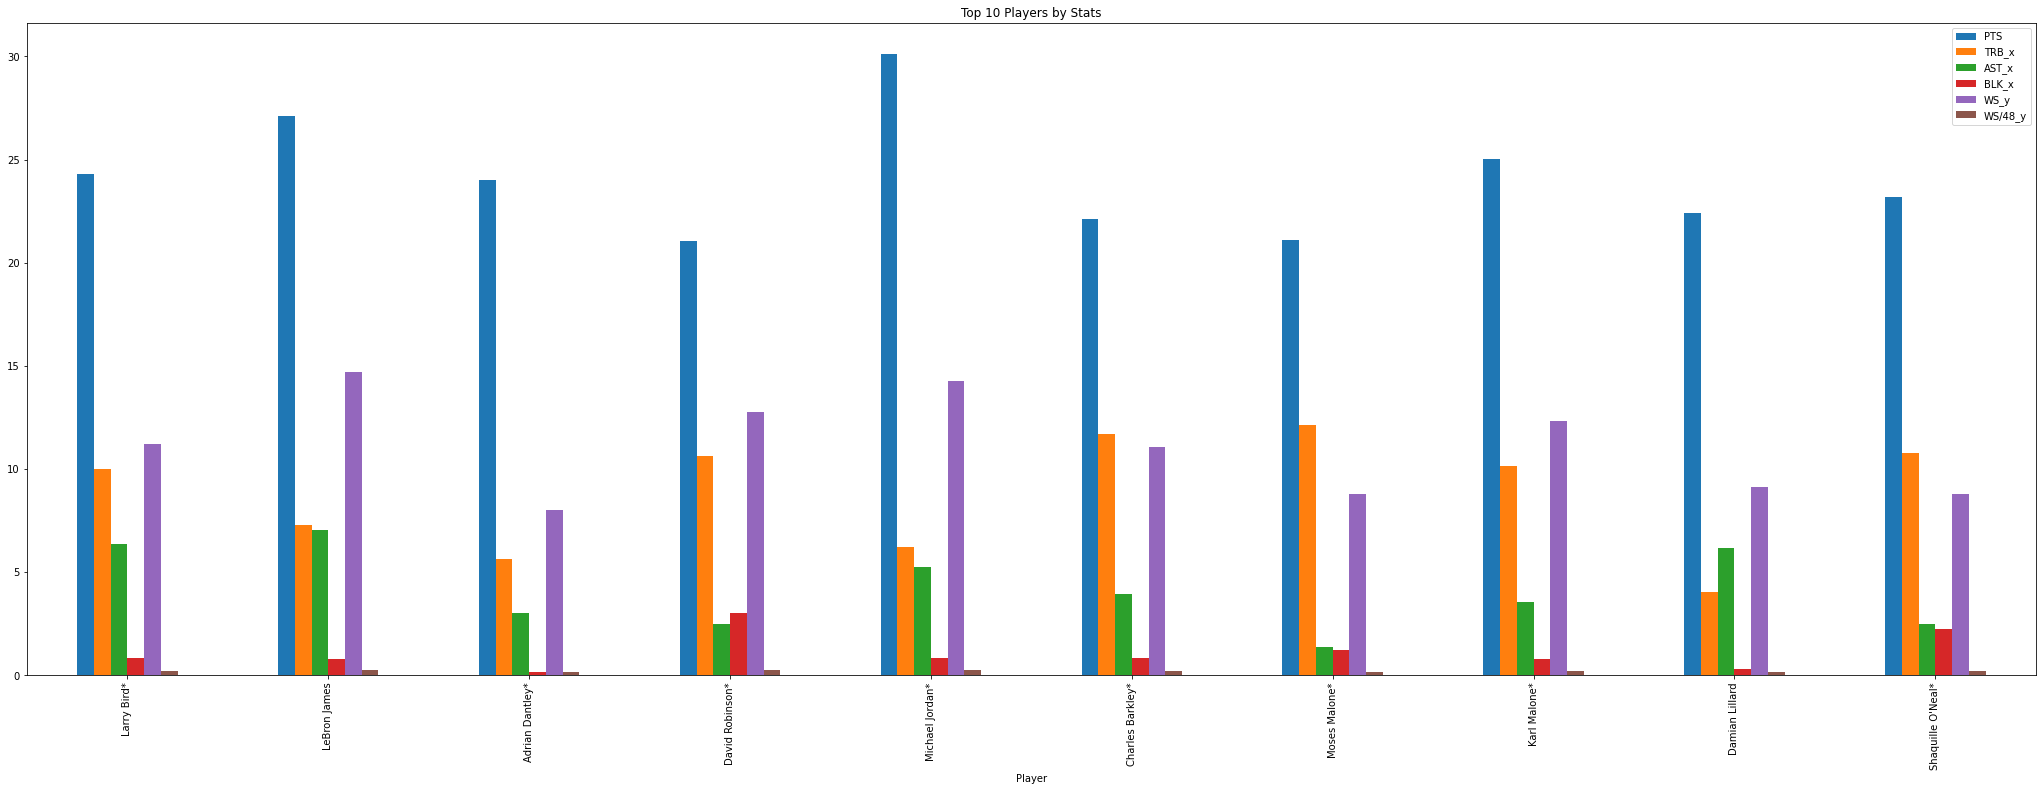

In [601]:
finalTable.sort_values(by=['predictions']).head(10).plot(title="Top 10 Players by Stats",x="Player", y=["PTS", "TRB_x","AST_x","BLK_x", "WS_y","WS/48_y"], kind="bar",figsize=(36,12))
plt.show()

Interestingly LeBron is number 2 on this list which supports the previous list, however overall the list contains overall many more older players. Though the same features were considered. The non-linear approach appears to have chosen players that have played more games for some reasona as well as choosing players despite their lower win shares. It seems to have placed more emphasis on rebounds and assists.

Overall this was an interesting project to put together, but I think there are many improvements to make, I will 